# **Sailfort Motors Human Resource Project : Providing data-driven suggestions for HR**
### By Faza Syafri Nur Rahman

# **PACE stages**


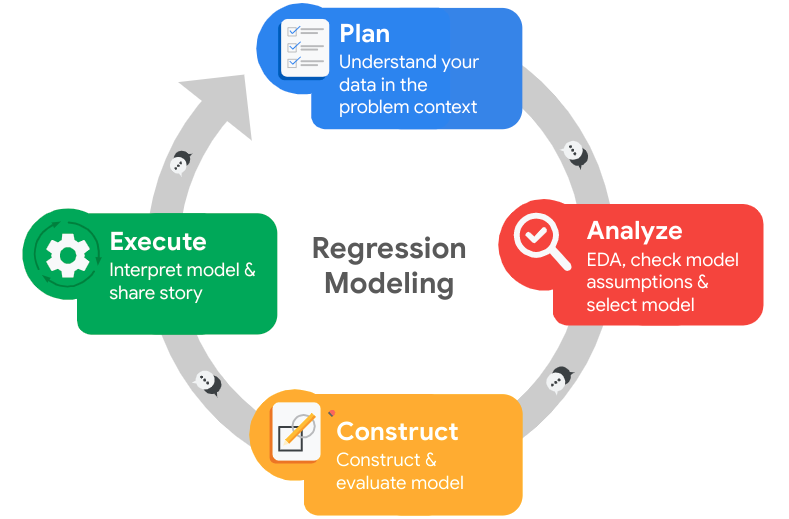

# **1. Pace: Plan**

## Understand The Business Scenario and Problem

### Context :
Departemen HRD di Salifort Motors ingin mengambil beberapa inisiatif untuk meningkatkan tingkat kepuasan karyawan di perusahaan. Mereka telah mengumpulkan data dari karyawan, tetapi sekarang mereka tidak tahu apa yang harus dilakukan dengannya. Mereka meminta saya sebagai seorang profesional analisis data untuk memberikan saran berdasarkan data berdasarkan pemahaman saya tentang data tersebut. Mereka memiliki pertanyaan berikut: apa yang kemungkinan besar membuat karyawan meninggalkan perusahaan?

Tujuan saya dalam proyek ini adalah untuk menganalisis data yang dikumpulkan oleh departemen HRD dan untuk membangun model yang memprediksi apakah iya atau tidak seorang karyawan akan meninggalkan perusahaan.

Jika saya dapat memprediksi karyawan yang kemungkinan besar akan berhenti, saya mungkin dapat mengidentifikasi faktor-faktor yang berkontribusi pada kepergian mereka. Karena menemukan, mewawancarai, dan mempekerjakan karyawan baru membutuhkan waktu dan biaya, meningkatkan retensi karyawan akan bermanfaat bagi perusahaan.

Target :

0 : Karyawan tidak ingin berhenti bekerja.

1 : Karyawan berhenti bekerja.

Pada dataset yang diberikan perusahaan, berisikan data yang mewakili profil karyawan yang telah meninggalkan perusahaan.

### Problem Statement : 

Perusahaan ingin mengidentifikasi karyawan yang berpotensi atau berisiko untuk pergi meninggalkan perusahaan dengan cara melihat faktor - faktor apa saja yang mungkin mendorong seorang karyawan untuk meninggalkan perusahaan dan tentunya hal ini dapat membuat perusahaan mengetahui bagaimana agar karyawan yang ada dapat betah dan tidak ada keinginan untuk keluar (*Employee Retention*).

### Goals :

Dalam proyek ini, tujuan kami berputar di sekitar analisis mendalam data yang dikumpulkan oleh departemen SDM perusahaan Sailfort Motors untuk mengetahui faktor apa saja yang membuat seorang karyawan betah atau ingin keluar agar dapat membuat rencana yang membuat karyawan betah dan juga pembuatan model untuk menentukan apakah seorang karyawan mungkin akan meninggalkan perusahaan dan juga tentunya tetap di perusahaan.

### Analytic Approach : 

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan karyawan yang mau keluar dari perusahaan dan yang tidak.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang karyawan akan/ingin keluar dari perusahaan tersebut atau tidak.

### Metric Evaluation

<img src='https://www.researchgate.net/profile/Mohammad-Haque-41/publication/333499920/figure/fig1/AS:767004050980864@1559879424238/A-confusion-matrix-summarises-all-possible-outcomes-in-a-binaryclassification-problem.png'>

Type 1 error : False Positive  diprediksi keluar padahal tidak
Konsekuensi: perusahaan kehilangan pegawai loyal, mengeluarkan cost untuk mentreat pegawai yang sebenarnya tidak ingin keluar atau justru dapat membuat pegawai memiliki perasaan kebingungan atau ketidaknyamanan akibat diprediksi mau keluar.

Type 2 error : False Negative  ketika diprediksi tidak keluar padahal keluar
Konsekuensi: terganggunya flow pekerjaan dan perusahaan harus menemukan, mewawancarai, dan mempekerjakan karyawan baru yang membutuhkan waktu dan biaya.

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi cost perekrutan dari perusahaan tersebut, tetapi sebisa mungkin tidak mengurangi pegawai yang loyal dengan perusahaan sehingga harus seimbang antara keduanya oleh karena itu kami disini menggunakan metric roc_auc.


## Data Understanding

Data ini bersumber dari data [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv) yang diberikan oleh Google Advance Data Analytic.

Note : 
- Sebagian besar fitur bersifat kategorikal (Nominal, Ordinal, Binary)
- Setiap baris data merepresentasikan informasi seorang karyawan yang bekerja dimasa lalu
- Target pada data ini adalah left

### Familiarize with the HR dataset

Kumpulan data yang akan Anda gunakan dalam laboratorium ini berisi 15.000 baris dan 10 kolom untuk variabel yang tercantum di bawah ini.

**Catatan:** lihat sumbernya di [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variabel | Data Type, Length |Deskripsi |
-----|-----|-----|
satisfaction_level|int64|Tingkat kepuasan kerja yang dilaporkan oleh karyawan [0&ndash;1]|
last_evaluation|int64|Nilai penilaian kinerja terakhir karyawan [0&ndash;1]|
number_project|int64|Jumlah proyek yang diambil oleh karyawan|
average_monthly_hours|int64|Rata-rata jumlah jam kerja karyawan per bulan|
time_spend_company|int64|Lama karyawan telah bekerja di perusahaan (tahun)
Work_accident|int64|Apakah karyawan mengalami kecelakaan saat bekerja
left|int64|Apakah karyawan telah meninggalkan perusahaan
promotion_last_5years|int64|Apakah karyawan telah dipromosikan dalam 5 tahun terakhir
Department|str|Departemen karyawan
salary|str|Gaji karyawan (dalam dolar Amerika Serikat)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno 
%matplotlib inline

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# Preprocessing
import category_encoders as ce
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, RobustScaler, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# traintest split
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

# Imbalance
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.pipeline import Pipeline as Pipeline_Imba

# Data Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier # Boosting
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, StackingClassifier
import lightgbm as lgb

# Evaluation Metric
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve, confusion_matrix, fbeta_score, make_scorer

# Feature Selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load Dataset

In [2]:
# Load dataset into a dataframe

df = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA, Data Understanding, and data cleaning)

- Memahami variabel
- Clean dataset (missing data, redundant data, rename, outliers)



### Melihat informasi dasar tentang data

In [3]:
# Check informasi dasar dari data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# atau dapat menggunakan coding ini dimana selain menampilkan apa yang .info tampilkan juga menampilkan unique dari setiap columns

listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,satisfaction_level,float64,0,0.0,92,"[0.29, 0.73]"
1,last_evaluation,float64,0,0.0,65,"[0.86, 0.63]"
2,number_project,int64,0,0.0,6,"[4, 5]"
3,average_montly_hours,int64,0,0.0,215,"[145, 307]"
4,time_spend_company,int64,0,0.0,8,"[7, 3]"
5,Work_accident,int64,0,0.0,2,"[1, 0]"
6,left,int64,0,0.0,2,"[1, 0]"
7,promotion_last_5years,int64,0,0.0,2,"[0, 1]"
8,Department,object,0,0.0,10,"[RandD, marketing]"
9,salary,object,0,0.0,3,"[low, high]"


Terlihat bahwa terdapat 10 variabel pada data dengan 3 type data, lalu terlihat juga tidak ada missing value pada data.

### Melihat descriptive statistics dari data

In [5]:
# Check descriptive statistics pada data

df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

Sebagai langkah pembersihan data, ubah nama kolom yang diperlukan (jika memang dibutuhkan). Standarisasikan nama kolom sehingga semuanya dalam format `snake_case`, perbaiki nama kolom yang salah eja, dan singkatkan nama kolom sesuai kebutuhan.

In [6]:
# Display semua nama kolom

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
df['left'].unique()

array([1, 0], dtype=int64)

Mari kita rubah agar semuanya menjadi huruf kecil dan juga kita ubah unique di kolom `left` dimana 0 menjadi stay dan 1 menjadi left.

In [8]:
# Rename columns as needed

df = df.rename(columns={'Work_accident' : 'work_accident', 
                         'average_montly_hours' : 'average_monthly_hours', 
                         'time_spend_company': 'tenure',
                          'Department': 'department'})

#copy dataframe karena akan mengubah unique dari kolom left
df0 = df.copy()

# Ubah unique di kolom left
df0['left'] = df0['left'].replace({0: 'stay', 1: 'left'})

# Display all column names after the update

print(df0.columns)
print()
print(df0['left'].unique())

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

['left' 'stay']


### Check missing values

Cek apakah ada missing values di dalam data.

In [9]:
# Check missing values

df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

sesuai dengan diatas bahwa tidak terdapat missing value pada data.

### Check duplicates

Cek untuk mengetahui apakah terdapat data duplicate di dalam data.

In [10]:
# Check for duplicates

df0.duplicated().sum()

3008

In [11]:
# Periksa beberapa baris yang berisi data yang duplikat.

df0[df0.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,left,0,sales,low
866,0.41,0.46,2,128,3,0,left,0,accounting,low
1317,0.37,0.51,2,127,3,0,left,0,sales,medium
1368,0.41,0.52,2,132,3,0,left,0,RandD,low
1461,0.42,0.53,2,142,3,0,left,0,sales,low
1516,0.40,0.50,2,127,3,0,left,0,IT,low
1616,0.37,0.46,2,156,3,0,left,0,sales,low
1696,0.39,0.56,2,160,3,0,left,0,sales,low
1833,0.10,0.85,6,266,4,0,left,0,sales,low
12000,0.38,0.53,2,157,3,0,left,0,sales,low


Output di atas menunjukkan lima input pertama dari baris yang diduplikasi lebih jauh dalam dataframe. Seberapa mungkin bahwa ini adalah input yang sah? Dalam kata lain, seberapa masuk akalnya dua karyawan melaporkan respons yang persis sama untuk setiap kolom?

Kita dapat melakukan analisis kemungkinan dengan menerapkan teorema Bayes dan mengalikan probabilitas menemukan setiap nilai di setiap kolom, tetapi ini tampaknya tidak diperlukan. Dengan beberapa variabel kontinu di sepanjang 10 kolom, tampaknya sangat tidak mungkin bahwa observasi ini sah. kita dapat melanjutkan dengan menghapusnya (.drop_duplicates).

In [12]:
# Drop duplicates and simpan hasil ke dataframe baru dengan nama variabel baru.

df1 = df0.drop_duplicates(keep='first')

# Display beberapa baris dari dataframe baru

df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,left,0,sales,low
1,0.80,0.86,5,262,6,0,left,0,sales,medium
2,0.11,0.88,7,272,4,0,left,0,sales,medium
3,0.72,0.87,5,223,5,0,left,0,sales,low
4,0.37,0.52,2,159,3,0,left,0,sales,low


In [13]:
print(df0.shape)
print(df1.shape)

(14999, 10)
(11991, 10)


Setelah melakukan data cleaning mari kita lihat kembali secara keseluruhan.

In [14]:
listItem = []
for col in df1.columns :
    listItem.append([col, df1[col].dtype, df1[col].min(), df1[col].max(), df1[col].isna().sum(), round((df1[col].isna().sum()/len(df1[col])) * 100,2),
                    df1[col].nunique(), df1[col].unique()]);

dfDesc2 = pd.DataFrame(columns=['dataFeatures', 'dataType', 'max', 'min', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc2

,dataFeatures,dataType,max,min,null,nullPct,unique,uniqueSample
0,satisfaction_level,float64,0.09,1.0,0,0.0,92,"[0.38, 0.8, 0.11, 0.72, 0.37, 0.41, 0.1, 0.92,..."
1,last_evaluation,float64,0.36,1.0,0,0.0,65,"[0.53, 0.86, 0.88, 0.87, 0.52, 0.5, 0.77, 0.85..."
2,number_project,int64,2,7,0,0.0,6,"[2, 5, 7, 6, 4, 3]"
3,average_monthly_hours,int64,96,310,0,0.0,215,"[157, 262, 272, 223, 159, 153, 247, 259, 224, ..."
4,tenure,int64,2,10,0,0.0,8,"[3, 6, 4, 5, 2, 8, 10, 7]"
5,work_accident,int64,0,1,0,0.0,2,"[0, 1]"
6,left,object,left,stay,0,0.0,2,"[left, stay]"
7,promotion_last_5years,int64,0,1,0,0.0,2,"[0, 1]"
8,department,object,IT,technical,0,0.0,10,"[sales, accounting, hr, technical, support, ma..."
9,salary,object,high,medium,0,0.0,3,"[low, medium, high]"


Summary:
- Tidak terdapat missing value pada data
- terdapat perubahan pada nama kolom dimana menjadi huruf kecil semua dan perubahaan value unique pada kolom left
- Terdapat data duplikat di data ini, sudah dilakukan pembersihan sehingga tidak ada lagi data yang duplikat.

### Check outliers

Cek outliers yang terdapat di dalam data.

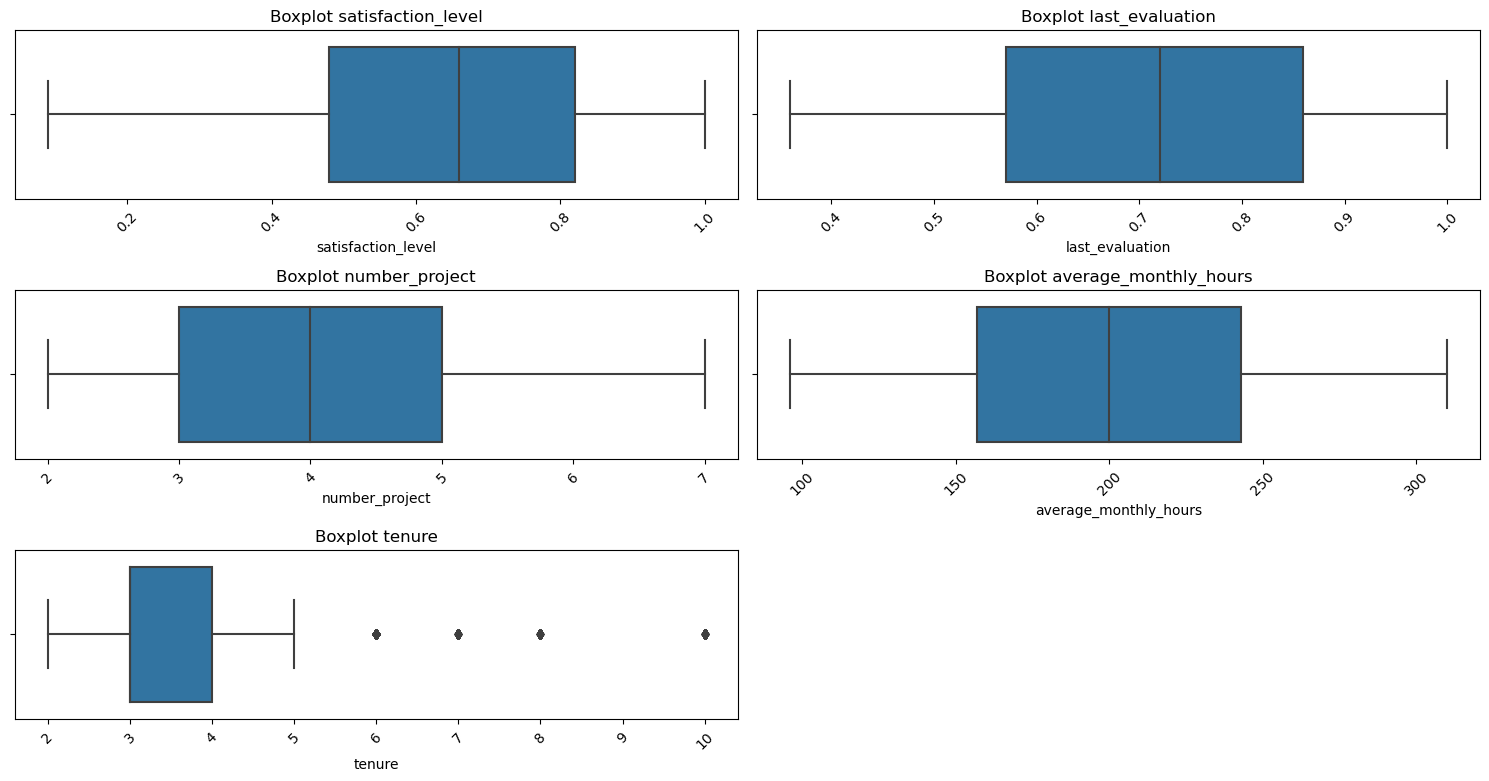

In [15]:
# Kolom apa saja yang akan di cek outliersnya
columns_to_check = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']

# Membuat boxplot untuk setiap kolom
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check):
    plt.subplot(4, 2, i + 1)  # 4 baris, 2 kolom
    sns.boxplot(x=df1[column])
    plt.title(f'Boxplot {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Terlihat bahwa hanya kolom `tenure` yang memiliki outlier, mari kita fokuskan ke kolom ini.

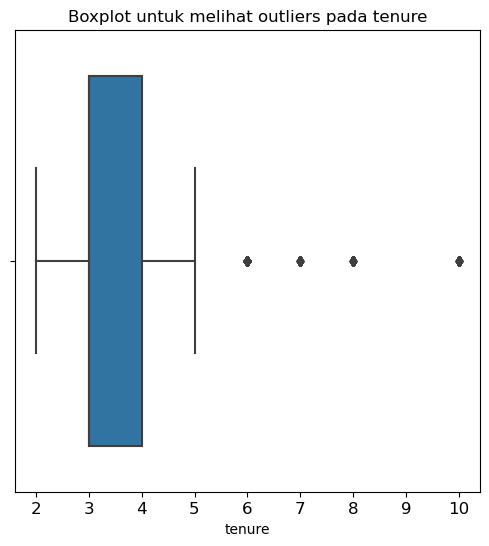

In [16]:
# Buat boxplot untuk memvisulisasikan distribusi dari `tenure` dan deteksi outliers

plt.figure(figsize=(6,6))
plt.title('Boxplot untuk melihat outliers pada tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

In [17]:
# Tentukan jumlah baris yang mengandung outlier.

# Hitung nilai percentile 25 pada `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Hitung nilai percentile 75 pada `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Hitung jarak interquartile pada `tenure`
iqr = percentile75 - percentile25

# Tentukan batas atas (upper limit) dan batas bawah (lower limit) untuk nilai-nilai yang bukan outlier pada 'tenure'.
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identifikasi subset data yang mengandung outlier dalam tenure.
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Hitung berapa banyak baris yang mengandung outliers pada data `tenure`
print("Jumlah baris pada data yang mengandung Outliers pada data `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Jumlah baris pada data yang mengandung Outliers pada data `tenure`: 824


In [18]:
outliers

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,left,0,sales,medium
17,0.78,0.99,4,255,6,0,left,0,sales,low
34,0.84,0.87,4,246,6,0,left,0,hr,low
47,0.57,0.70,3,273,6,0,left,0,support,low
67,0.90,0.98,4,264,6,0,left,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,stay,1,management,high
11995,0.90,0.55,3,259,10,1,stay,1,management,high
11996,0.74,0.95,5,266,10,0,stay,1,management,high
11997,0.85,0.54,3,185,10,0,stay,1,management,high


Terlihat pada kolom `tenure` terdapat 824 baris data yang mengandung outlier namun pada tahap ini akan kita biarkan karena berguna untuk analisa EDA kita.

Beberapa jenis model lebih sensitif terhadap outlier daripada yang lain. Ketika mencapai tahap membangun model, pertimbangkan apakah akan menghapus outlier, berdasarkan jenis model yang dipilih untuk digunakan. 

# pAce: Analyze Stage
- Perform EDA (Analisa hubungan antar variables)



## Step 2. Data Exploration (Continue EDA)

Mari kira lihat berapa banyak karyawan yang meninggalkan perusahaan dan persentase dari semua karyawan yang jumlahnya ini mewakili.

In [19]:
# Berapa orang yang tetap dan yang pergi.

print(df1['left'].value_counts())
print()

# Persentase orang yang tetap dan yang pergi.

print(df1['left'].value_counts(normalize=True))

stay    10000
left     1991
Name: left, dtype: int64

stay    0.833959
left    0.166041
Name: left, dtype: float64


### Data visualizations

Mari kita periksa variabel-variabel yang berpengaruh terhadap tingkat karyawan yang keluar dan buat grafik untuk memvisualisasikan hubungan antara variabel-variabel tersebut.

In [20]:
# Menampilkan nama kolom pada data
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

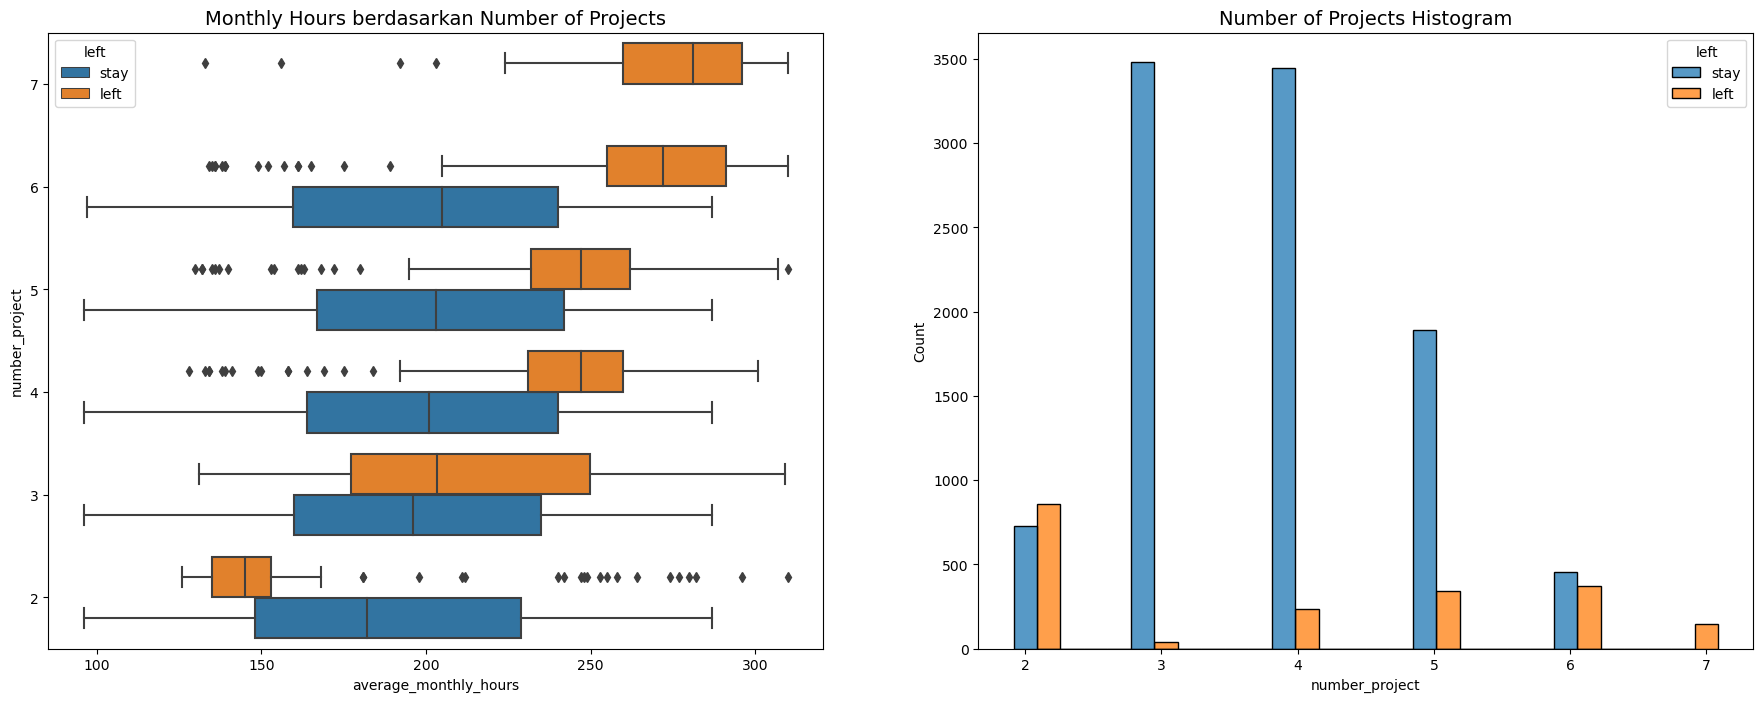

In [31]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Buat boxplot yang menunjukkan distribusi `average_monthly_hours` untuk `number_project` untuk membandingkan karyawan yang tetap bekerja dengan yang keluar.
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', hue_order=['stay', 'left'], orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly Hours berdasarkan Number of Projects', fontsize='14')

# Buat histogram yang menunjukkan distribusi `number_project` untuk membandingkan karyawan yang tetap bekerja dengan yang keluar.
tenure_stay = df1[df1['left']=='stay']['number_project']
tenure_left = df1[df1['left']=='left']['number_project']
sns.histplot(data=df1, x='number_project', hue='left', hue_order=['stay', 'left'], multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of Projects Histogram', fontsize='14')

# Display the plots
plt.show()

Mungkin terlihat wajar bahwa orang yang bekerja pada banyak proyek juga bekerja dengan waktu yang lebih lama. Ini yang tampaknya terjadi pada perusahaan, dengan rata-rata jam dari setiap kelompok (yang tetap bekerja dan yang keluar) meningkat dengan jumlah proyek yang dikerjakan. Namun, ada beberapa hal yang menonjol dari plot ini.

1. Ada dua kelompok karyawan yang keluar dari perusahaan: (A) karyawan yang bekerja lebih sedikit daripada yang lain dengan jumlah proyek yang sama, dan (B) yang bekerja lebih banyak. Kelompok A bisa saja dipecat karena suatu hal atau ada penyebab lain, sedangkan kelompok B mungkin memutuskan untuk keluar atas kemauannya sendiri. Mungkin saja kelompok A sudah memberikan pemberitahuan mereka untuk keluar, sehingga diberikan lebih sedikit jam kerja. Sementara itu, kelompok B mungkin menjadi kontributor besar pada proyek-proyek mereka.

2. Semua karyawan yang memiliki tujuh proyek akhirnya keluar. Mereka yang memiliki enam proyek juga memiliki jam kerja yang sangat tinggi yaitu 255–295 jam/minggu jauh lebih banyak dari kelompok lainnya dan banyak dari mereka juga keluar.

3. Tampaknya jumlah proyek yang paling ideal adalah 3 hingga 4, karena jumlah karyawan yang keluar sangat sedikit dalam kelompok-kelompok ini.

4. Jika Anda mengasumsikan jumlah waktu kerja dalam seminggu 40 jam dan dua minggu liburan per tahun, maka rata-rata jumlah jam kerja per bulan karyawan yang bekerja Senin–Jumat `= 50 minggu * 40 jam per minggu / 12 bulan = 166,67 jam per bulan`. Jika dilihat hampir semua kelompok, termasuk yang tidak keluar, bekerja lebih dari jumlah ini. Hal ini menunjukkan bahwa para karyawan mungkin terlalu banyak bekerja.

Sebagai langkah selanjutnya, kita bisa memastikan bahwa semua karyawan dengan tujuh proyek keluar.

In [22]:
# Melihat jumlah pegawai yang tinggal/pergi dari jumlah proyek sebanyak 7.

df1[df1['number_project']==7]['left'].value_counts()

left    145
Name: left, dtype: int64

Hal ini mengkonfirmasi bahwa semua pegawai dengan jumlah proyek sebanyak 7 pergi/keluar dari perusahaan.

Selanjutnya kita lihat Average Monthly Hours dibandingkan dengan Satisfaction Level.

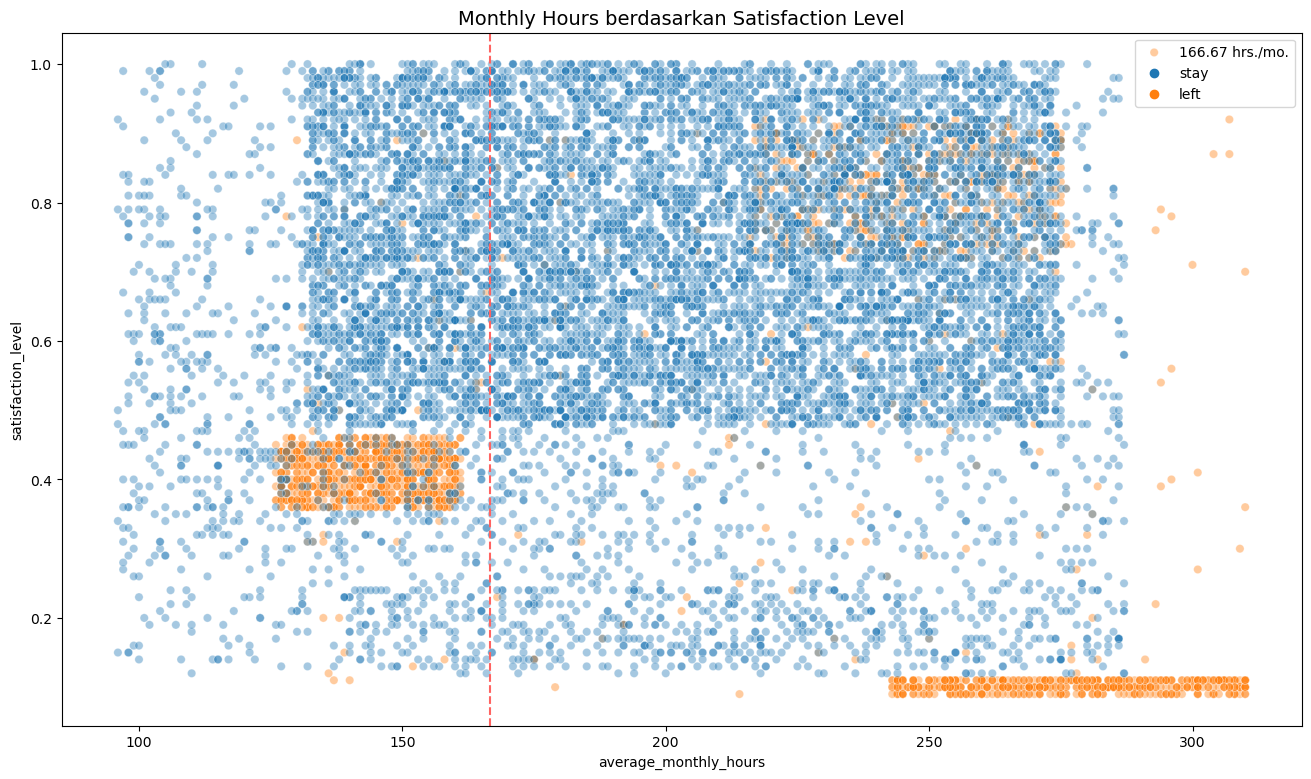

In [23]:
# Membuat scatterplot dari `average_monthly_hours` versus `satisfaction_level` untuk membandingkan karyawan yang tetap bekerja dan yang keluar.

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', hue_order=['stay', 'left'], alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stay', 'left'])
plt.title('Monthly Hours berdasarkan Satisfaction Level', fontsize='14');

Scatterplot di atas menunjukkan bahwa ada kelompok besar karyawan yang bekerja sekitar ~ 240–315 jam per bulan. 315 jam per bulan setara dengan lebih dari 75 jam per minggu selama setahun. Kemungkinan ini berhubungan dengan tingkat kepuasan mereka yang mendekati nol.

Plot diatas juga menunjukkan kelompok karyawan lain yang keluar, yaitu mereka yang memiliki jam kerja yang lebih normal. Meskipun begitu, tingkat kepuasan mereka hanya sekitar 0,4. Sulit untuk berspekulasi mengapa mereka memilih untuk pergi. Ada kemungkinan mereka merasa tertekan untuk bekerja lebih banyak, mengingat begitu banyak rekan mereka bekerja lebih banyak dan tekanan tersebut dapat menurunkan tingkat kepuasan mereka atau bisa juga karena hal lain yang terjadi di kantor.

Terakhir, ada kelompok yang bekerja sekitar 210–280 jam per bulan, dan tingkat kepuasan mereka berkisar antara 0,7–0,9.

Perhatikan bentuk distribusi yang aneh di sini. Menurut kami hal ini menunjukkan adanya manipulasi data atau data sintetis dikarenakan bentuk yang simetris yang tentunya seperti terkelompok dan tidak natural.

In [24]:
# Cek max dan min pada kolom average monthly hours
print('Max hours:', df1['average_monthly_hours'].max())
print('Min hours:', df1['average_monthly_hours'].min())

Max hours: 310
Min hours: 96


Disini terlihat bahwa minimal pegawai bekerja selama 96 jam per bulan atau ~ 5 jam sehari sedangkan maksimal adalah 310 jam perbulan atau ~ 15-16 jam sehari hampir 2 kali lipat dari rata-rata keseluruhan yaitu 166.67 jam per bulan.

dari sini kita dapat membuat suatu kolom baru untuk membantu analisa kita yaitu kolom overworked dimana kita ambil dimana data di atas 180 jam per bulan atau 9 jam per hari adalah overworked.

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  object 
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 1.0+ MB


In [26]:
# Buat copy dari dataframe 1
df2 = df1.copy()

# ubah nama kolom 'average_monthly_hours' menjadi 'overworked' dan simpan ke dataframe baru
df2['overworked'] = df2['average_monthly_hours']

# Buat `overworked` as working > 180 jam per minggu
df2['overworked'] = (df2['overworked'] > 180).astype(int)

In [27]:
# Display first few rows of new column
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  object 
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
 10  overworked             11991 non-null  int32  
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 1.1+ MB


In [28]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary,overworked
0,0.38,0.53,2,157,3,0,left,0,sales,low,0
1,0.80,0.86,5,262,6,0,left,0,sales,medium,1
2,0.11,0.88,7,272,4,0,left,0,sales,medium,1
3,0.72,0.87,5,223,5,0,left,0,sales,low,1
4,0.37,0.52,2,159,3,0,left,0,sales,low,0


In [29]:
df2['overworked'].value_counts()

1    7287
0    4704
Name: overworked, dtype: int64

Terlihat bahwa terdapat 7.287 karyawan yang bekerja diatas 180 jam per bulan dan 4.704 karyawan yang bekerja dibawah 180 jam per bulan.

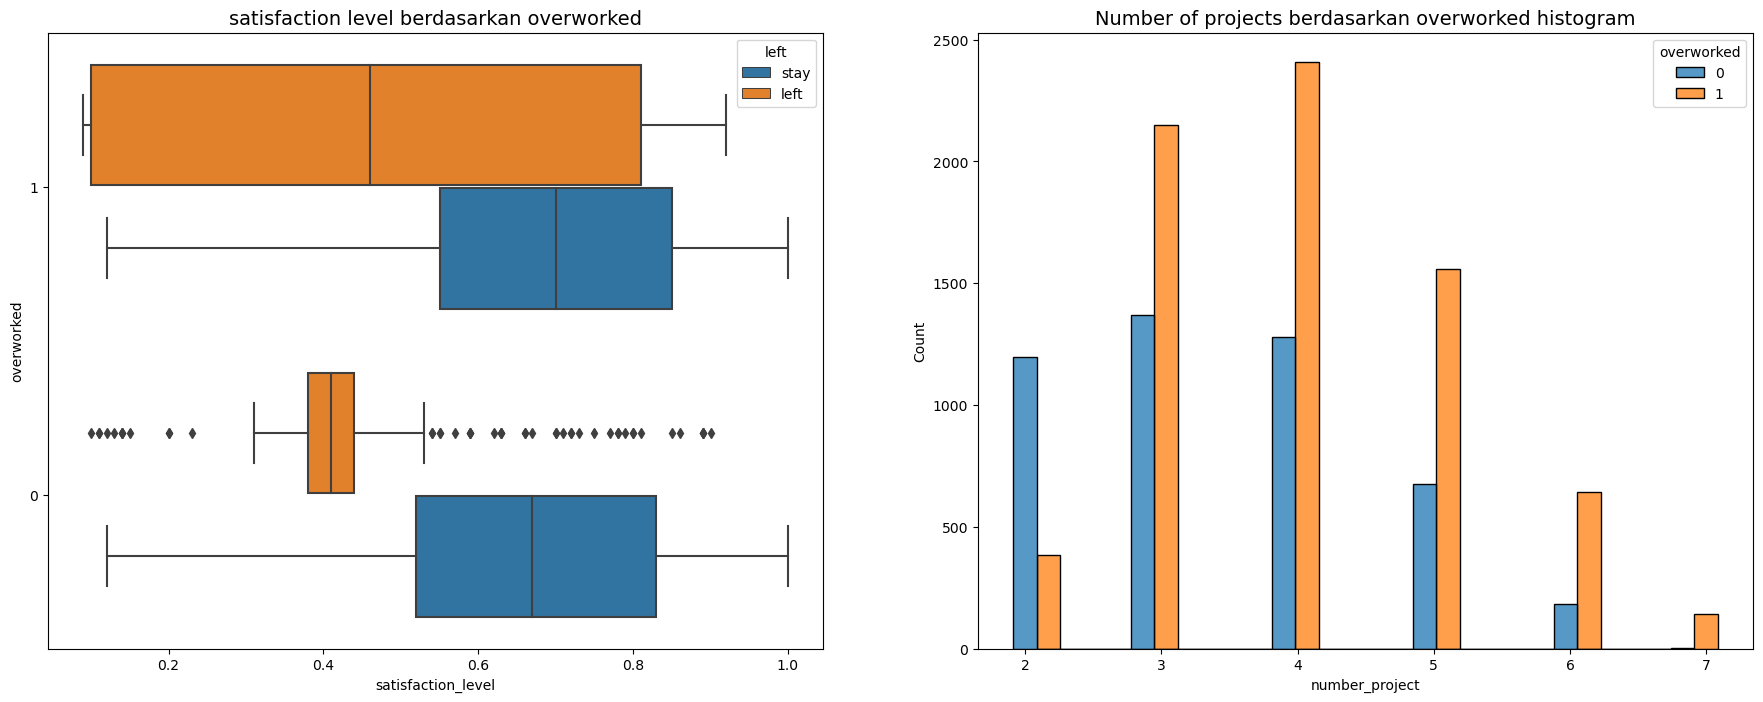

In [32]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Buat boxplot yang menunjukkan distribusi `satisfaction_level` berdasarkan `overworked` untuk membandingkan karyawan yang tetap bekerja dengan yang keluar.
sns.boxplot(data=df2, x='satisfaction_level', y='overworked', hue='left', hue_order=['stay', 'left'], orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('satisfaction level berdasarkan overworked', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_ow_stay = df2[df2['overworked']==0]['number_project']
tenure_ow_left = df2[df2['overworked']==1]['number_project']
sns.histplot(data=df2, x='number_project', hue='overworked', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects berdasarkan overworked histogram', fontsize='14')

# Display the plots
plt.show()

Jika dilihat berdasarkan plot diatas, bahwa nilai statisfaction untuk karyawan yang meninggalkan kantor adalah dari 0.0 - 0.8, jika di lihat juga ada yang tidak overworked namun tetap meninggalkan kantor dengan nilai statisfaction ~ 0.3 - 0.5. Untuk karyawan yang tetap bekerja di kantor ada di semua range dengan rata - rata di antara 0.5 - 0.9.

Jika dilihat dari histogram, sama dengan penjelasan di atas, rata - rata proyek yang dikerjakan oleh karyawan yang tidak overworked adalah 2 - 4, sedangkan hampir di semua jumlah proyek ada karyawan yang overworked dan jumlahnya lebih banyak dari karyawan yang tidak overworked.

Untuk visualisasi selanjutnya, menarik jika kita memvisualisasikan tingkat kepuasan berdasarkan masa kerja.

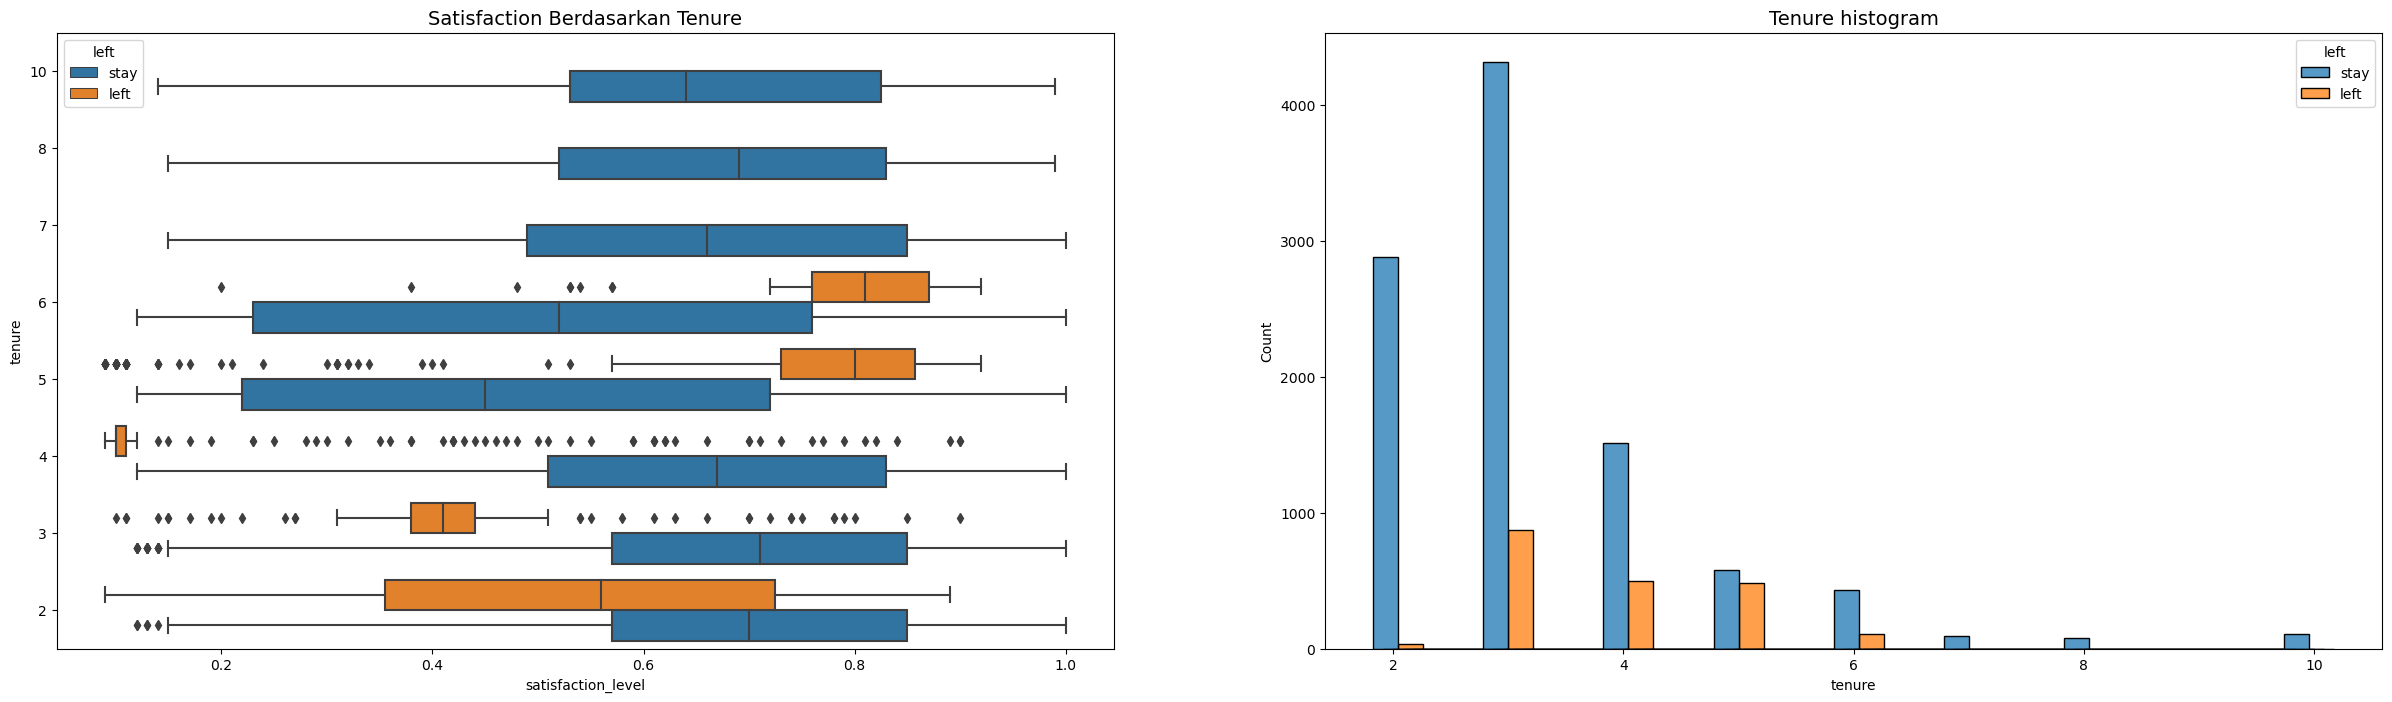

In [33]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (30,8))

# Membuat Boxplot yang menunjukkan distribusi tingkat kepuasan (satisfaction_level) berdasarkan masa kerja (tenure) untuk membandingkan karyawan yang tetap bekerja dan yang keluar.
sns.boxplot(data=df2, x='satisfaction_level', y='tenure', hue='left', hue_order=['stay', 'left'], orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction Berdasarkan Tenure', fontsize='14')

# Membuat histogram yang menunjukkan distribusi masa kerja (tenure) dengan membandingkan antara karyawan yang tetap bekerja dan yang keluar.
tenure_stay = df2[df2['left']=='stay']['tenure']
tenure_left = df2[df2['left']=='left']['tenure']
sns.histplot(data=df2, x='tenure', hue='left', hue_order=['stay', 'left'], multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

Terdapat banyak pengamatan yang dapat ditarik dari plot ini:
- Karyawan yang keluar terbagi menjadi dua kategori umum: karyawan yang tidak puas dengan masa kerja pendek dan karyawan yang sangat puas dengan masa kerja menengah.
- Karyawan dengan masa kerja empat tahun yang keluar tampaknya memiliki tingkat kepuasan yang sangat rendah. Mungkin perlu dilakukan investigasi terkait penyebab kenapa mereka keluar, apakah terdapat perubahan pada perusahaan yang mungkin memengaruhi orang-orang pada jangka waktu empat tahun tersebut atau ada hal lainnya.
- Karyawan dengan masa kerja terpanjang tidak keluar. Tingkat kepuasan mereka sejalan dengan karyawan baru yang tetap bekerja yang menunjukkan mereka puas.
- Histogram diatas menunjukkan bahwa jumlah karyawan dengan masa kerja yang lebih lama relatif sedikit. Kemungkinan mereka adalah karyawan dengan jabatan dan gaji yang lebih tinggi atau mereka memiliki loyalitas yang sangat tinggi atau mereka bisa jadi mendapatkan suatu priviledge atau diistimewakan.

Sebagai langkah selanjutnya dalam menganalisis data, kita dapat menghitung rata-rata dan median skor kepuasan karyawan yang keluar dan yang tidak keluar.

In [34]:
# Hitung mean dan median skor kepuasan karyawan yang pergi dan yang tetap

df2.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
left,0.440271,0.41
stay,0.667365,0.69


Seperti yang diperkirakan, skor mean dan median kepuasan karyawan yang pergi lebih rendah daripada mereka yang tetap. Yang menarik, di antara karyawan yang tetap, skor rata-rata kepuasan tampaknya sedikit di bawah skor median. Ini menunjukkan bahwa tingkat kepuasan di antara yang tetap mungkin memiliki kecondongan ke arah keluar / pergi.

Selanjutnya, kita dapat memeriksa tingkat gaji untuk berbagai lamanya bekerja.

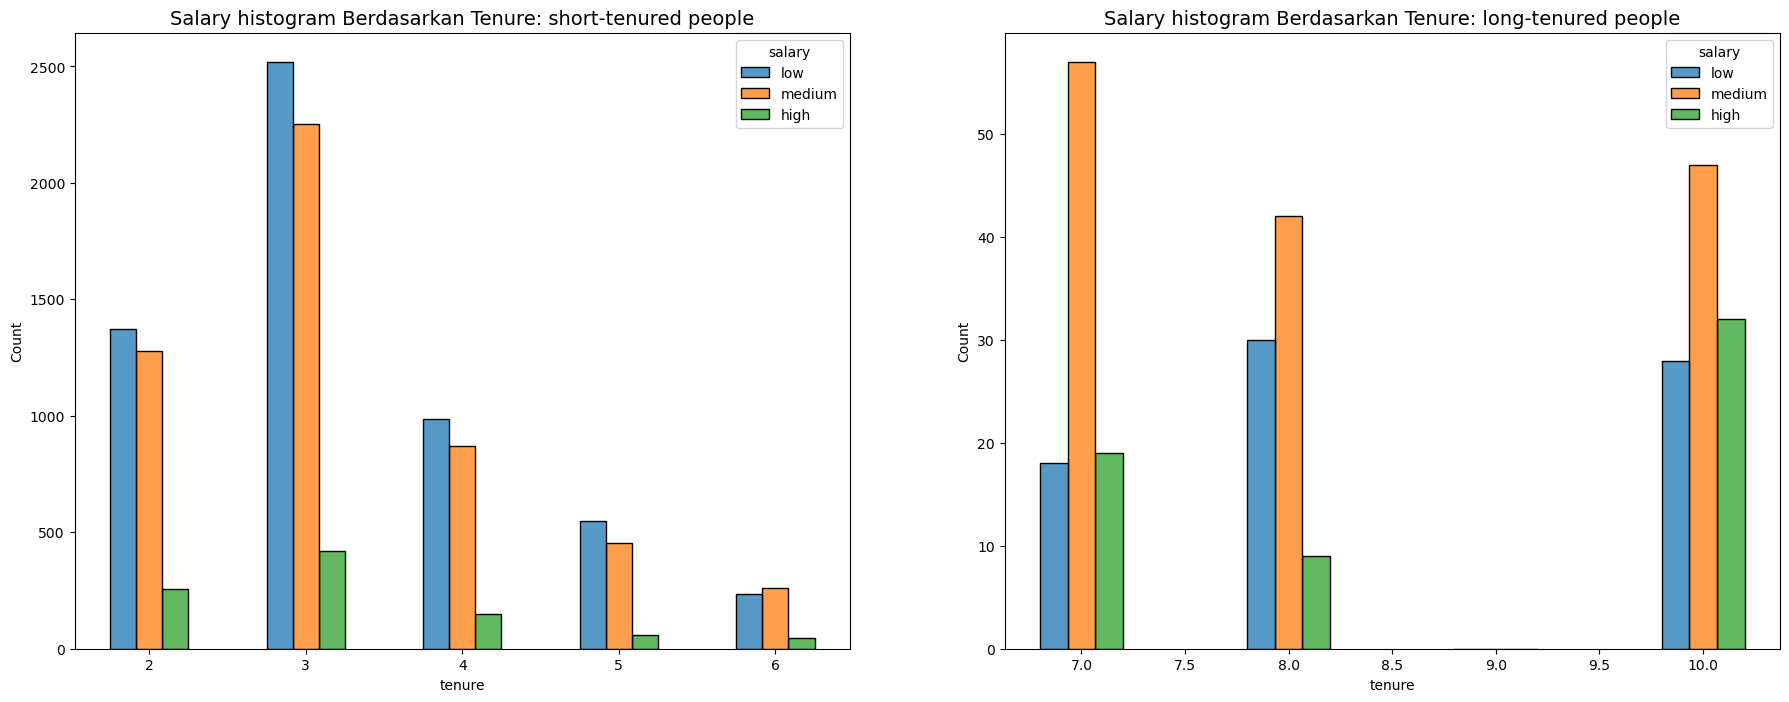

In [35]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df2[df2['tenure'] < 7]

# Define long-tenured employees
tenure_long = df2[df2['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram Berdasarkan Tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram Berdasarkan Tenure: long-tenured people', fontsize='14');

Grafik di atas menunjukkan bahwa karyawan yang sudah bekerja dalam jangka waktu lama tidak secara signifikan terdiri dari karyawan yang berpenghasilan tinggi.

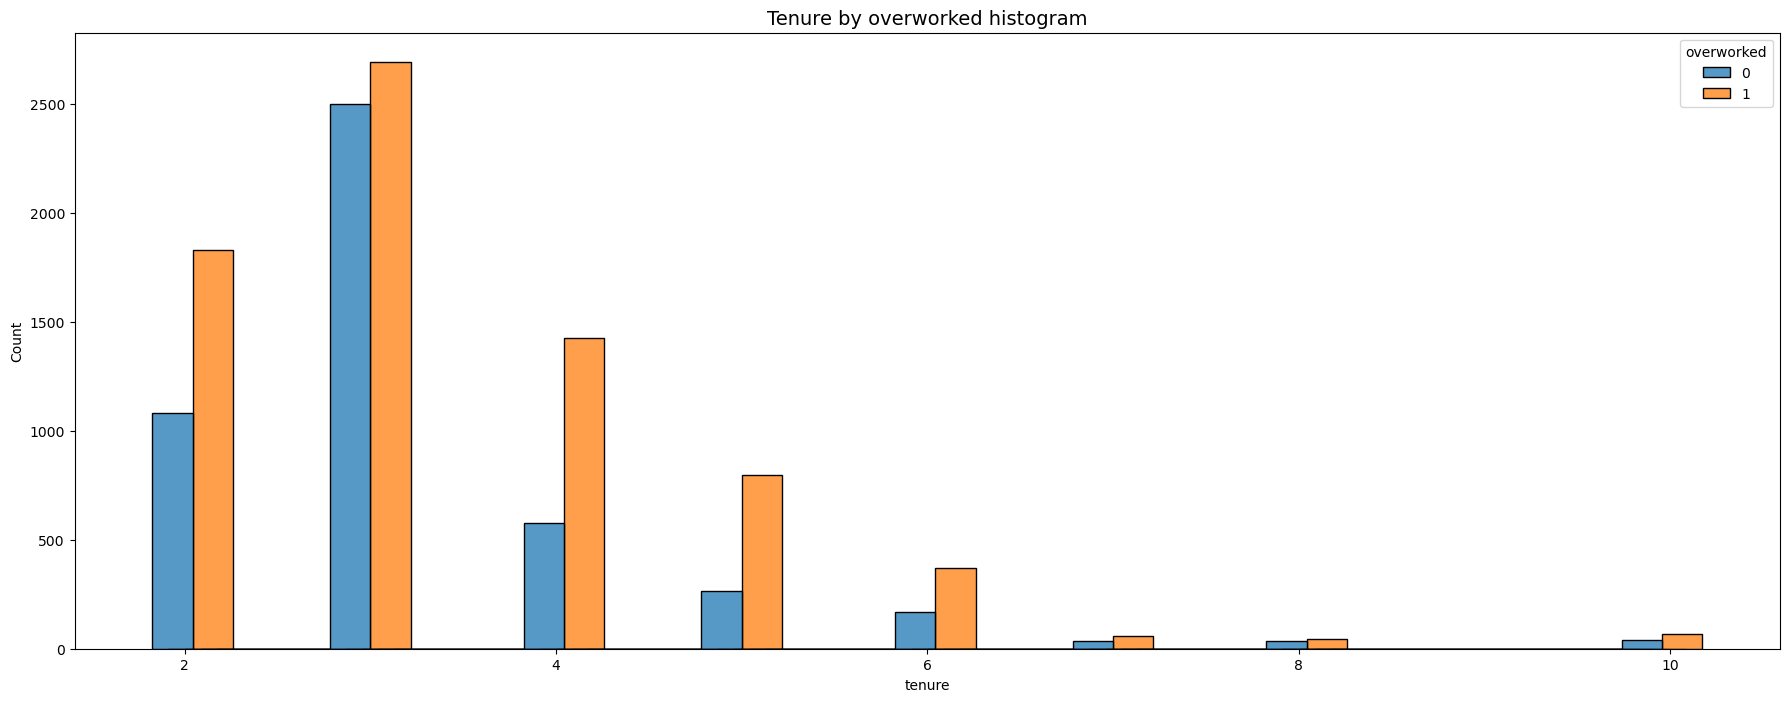

In [36]:
# Set figure and axes
fig, ax = plt.subplots(figsize = (22,8))

# Membuat histogram yang menunjukkan distribusi masa kerja (tenure) dengan membandingkan antara karyawan yang tetap bekerja dan yang keluar.
tenure_ow_stay = df2[df2['overworked']==0]['tenure']
tenure_ow_left = df2[df2['overworked']==1]['tenure']
sns.histplot(data=df2, x='tenure', hue='overworked', multiple='dodge', shrink=5)
ax.set_title('Tenure by overworked histogram', fontsize='14')

plt.show();

berdasarkan tenure by overworked terlihat bahwa karyawan dengan jumlah tenure berapa pun semuanya banyak yang overworked bahka selalu lebih banyak dari pada karyawan yang tidak overworked.

Selanjutnya, kita lihat apakah ada korelasi antara bekerja dalam waktu yang lama dan mendapatkan penilaian tinggi dengan membuat scatterplot `average_monthly_hours` versus `last_evaluation`.

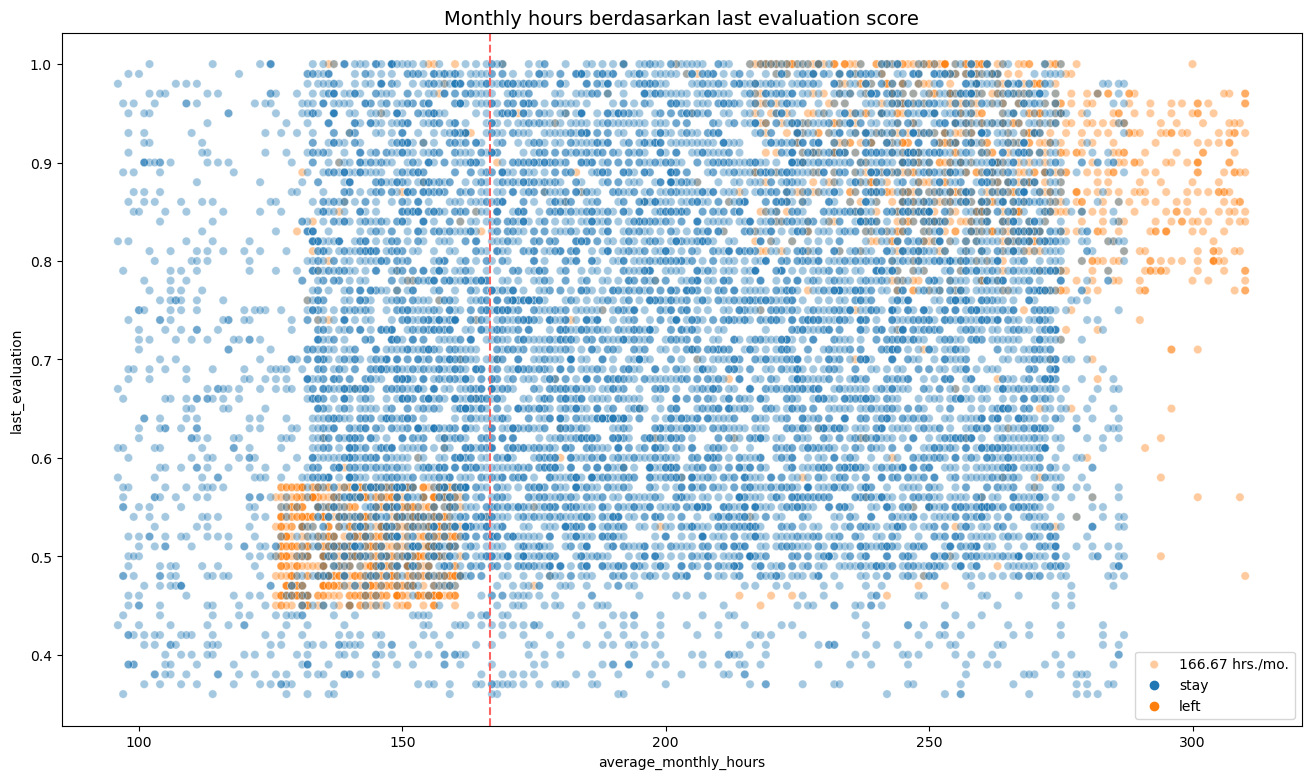

In [37]:
# Buat scatterplot `average_monthly_hours` dibandingkan dengan `last_evaluation`

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df2, x='average_monthly_hours', y='last_evaluation', hue='left', hue_order=['stay', 'left'], alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stay', 'left'])
plt.title('Monthly hours berdasarkan last evaluation score', fontsize='14');

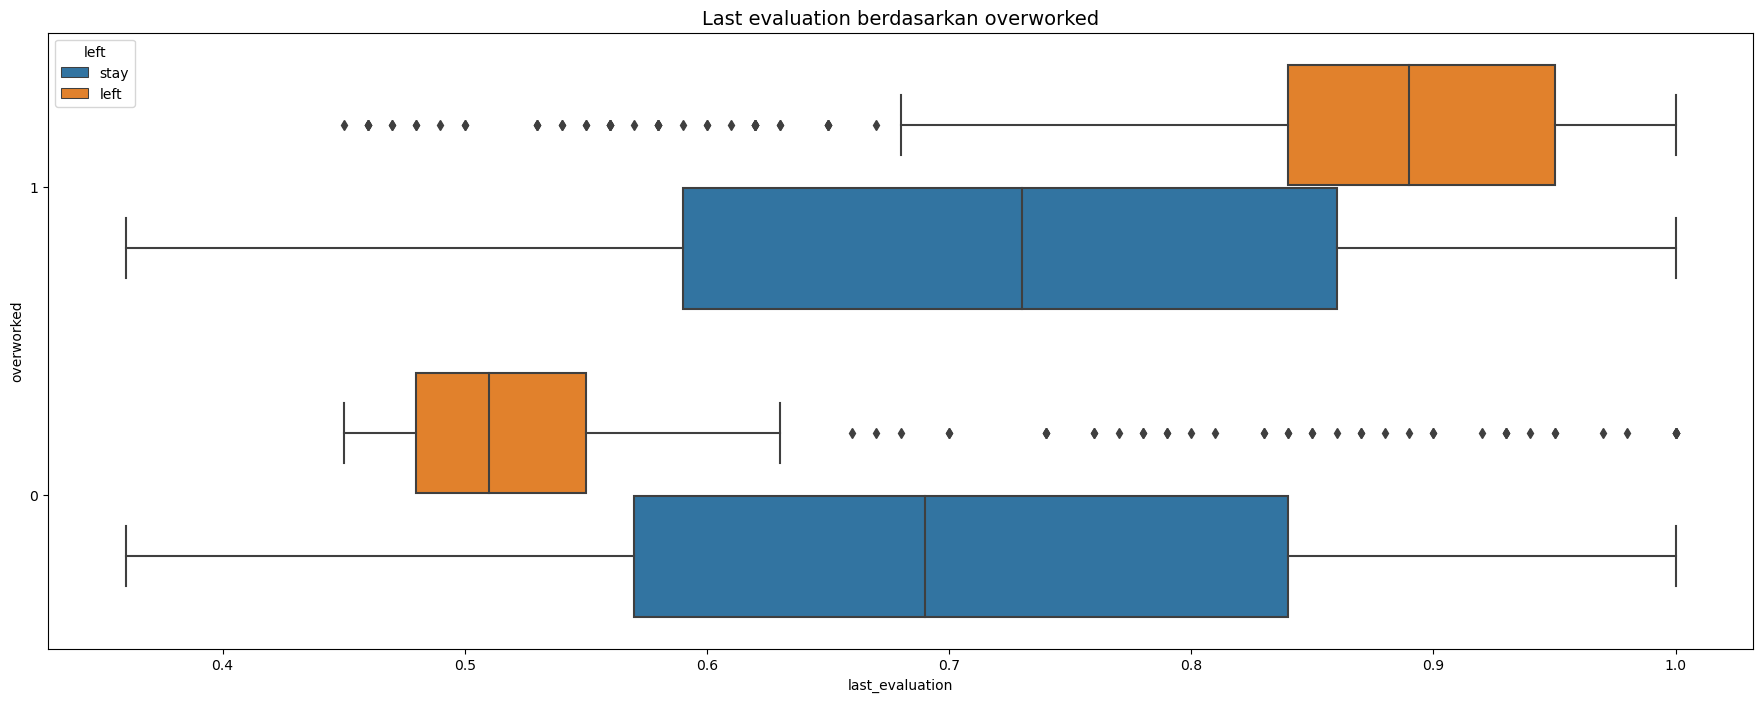

In [38]:
# Set figure and axes
fig, ax = plt.subplots(figsize = (22,8))

# Buat boxplot yang menunjukkan distribusi `satisfaction_level` berdasarkan `overworked` untuk membandingkan karyawan yang tetap bekerja dengan yang keluar.
sns.boxplot(data=df2, x='last_evaluation', y='overworked', hue='left', hue_order=['stay', 'left'], orient="h")
ax.invert_yaxis()
ax.set_title('Last evaluation berdasarkan overworked', fontsize='14')

plt.show();

Dari scatterplot dan boxplot di atas, dapat ditarik beberapa pengamatan sebagai berikut:
- Scatterplot dan boxplot menunjukkan dua kelompok karyawan yang keluar: karyawan yang bekerja keras dan berkinerja sangat baik, serta karyawan yang bekerja sedikit di bawah rata-rata bulanan nominal sekitar 166,67 jam dengan penilaian yang lebih rendah.
- Terlihat adanya korelasi antara jam kerja dan skor penilaian.
- Tidak ada persentase tinggi dari karyawan di kuadran kiri atas plot. Namun, dapat dilihat juga bahwa bekerja dalam waktu yang lama tidak menjamin skor penilaian yang baik.
- Sebagian besar karyawan di perusahaan ini bekerja lebih dari 167 jam per bulan.

Selanjutnya, kita dapat memeriksa apakah karyawan yang bekerja dalam waktu yang sangat lama telah dipromosikan dalam lima tahun terakhir.

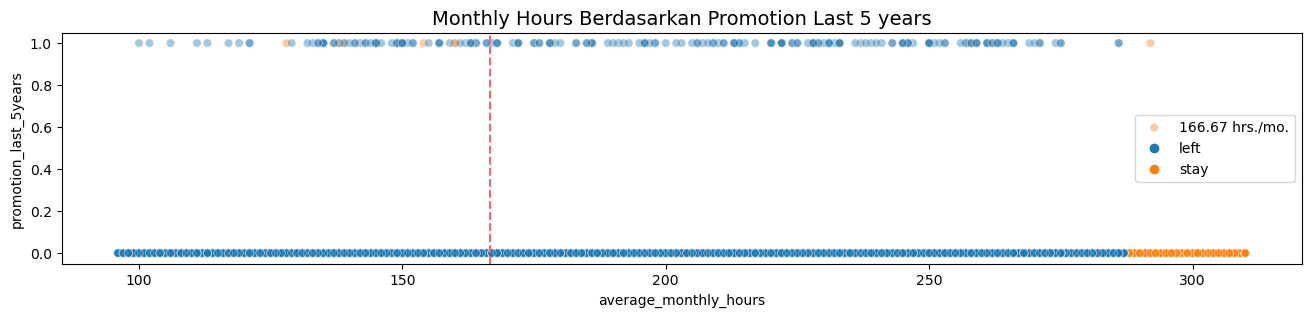

In [39]:
# Buat plot untuk memeriksa hubungan antara `average_monthly_hours` dan `promotion_last_5years`

plt.figure(figsize=(16, 3))
sns.scatterplot(data=df2, x='average_monthly_hours', y='promotion_last_5years', hue='left', hue_order=['stay', 'left'], alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stay'])
plt.title('Monthly Hours Berdasarkan Promotion Last 5 years', fontsize='14');

Dari plot diatas dapat dilihat bahwa:
- sangat sedikit karyawan yang dipromosikan dalam jangka waktu 5 tahun terakhir.
- sangat sedikit karyawan yang bekerja dengan waktu kerja yang lama dipromosikan.
- semua karyawan yang keluar dari perusahaan adalah karyawan yang bekerja dengan waktu kerja yang sangat lama.

Selanjutnya, kita dapat melihat bagaimana karyawan yang keluar tersebar di antar departemen pada perusahaan.

In [40]:
# Jumlah Karyawan di setiap departement

df2["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

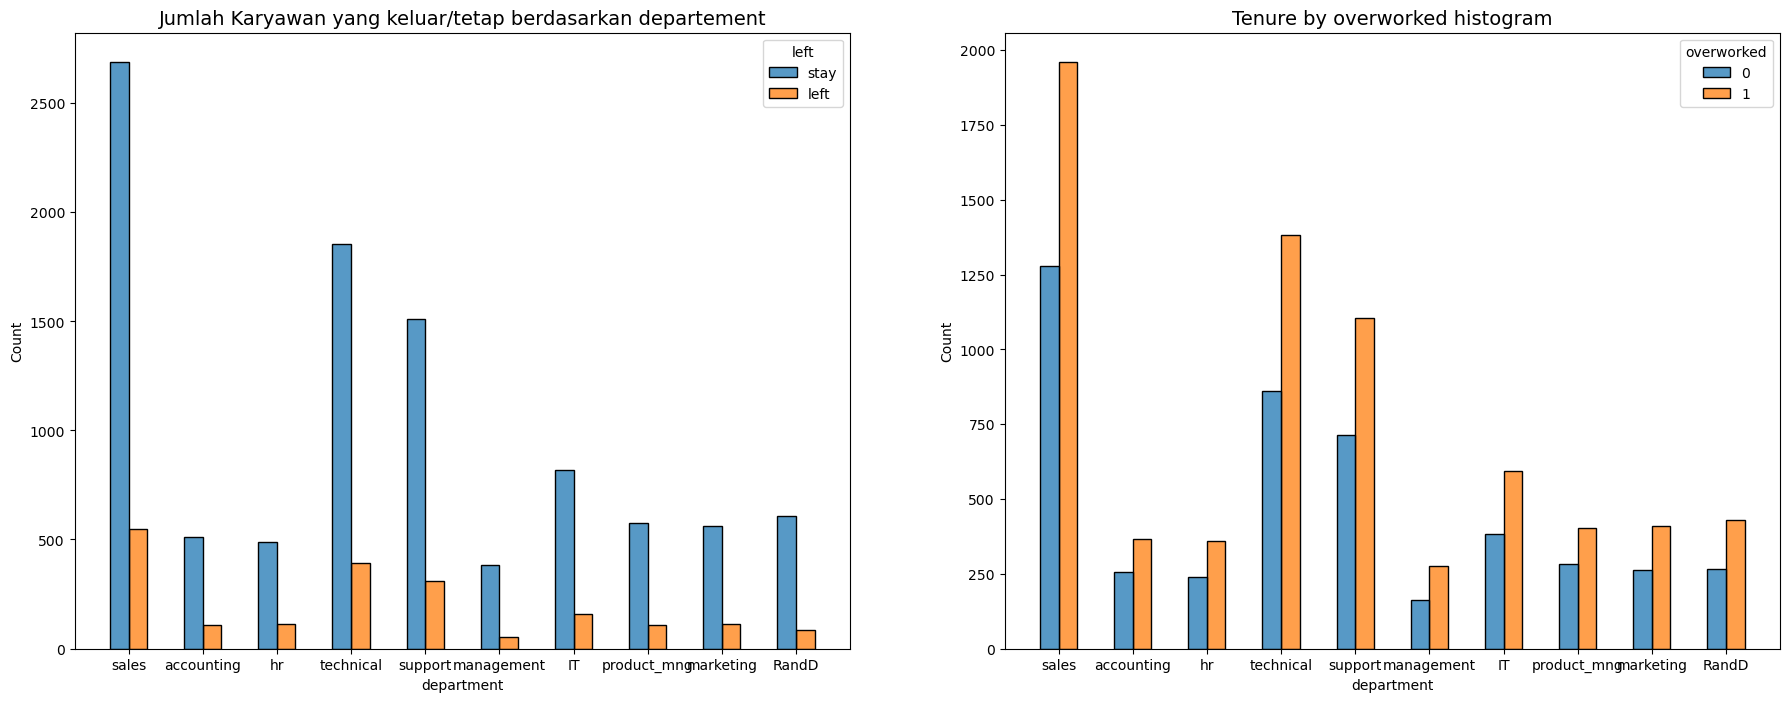

In [41]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.histplot(data=df2, x='department', hue='left', discrete=1, hue_order=['stay', 'left'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Jumlah Karyawan yang keluar/tetap berdasarkan departement', fontsize=14)

# Membuat histogram yang menunjukkan distribusi masa kerja (tenure) dengan membandingkan antara karyawan yang tetap bekerja dan yang keluar.
sns.histplot(data=df2, x='department', hue='overworked', discrete=1, multiple='dodge', shrink=.5, ax=ax[1])
ax[1].set_title('Tenure by overworked histogram', fontsize='14')

plt.show();

Tidak terlihat ada departement yang memiliki tingkat karyawan yang keluar secara signifikan berdasarkan proporsi antara karyawan yang tetap dan yang keluar lalu jika berdasarkan overworked departement semua departement memiliki karyawan yang overworked.

Terakhir kita bisa cek apakah terdapat korelasi antar setiap variabel.

C:\Users\Fazas\AppData\Local\Temp\ipykernel_18640\252512191.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))


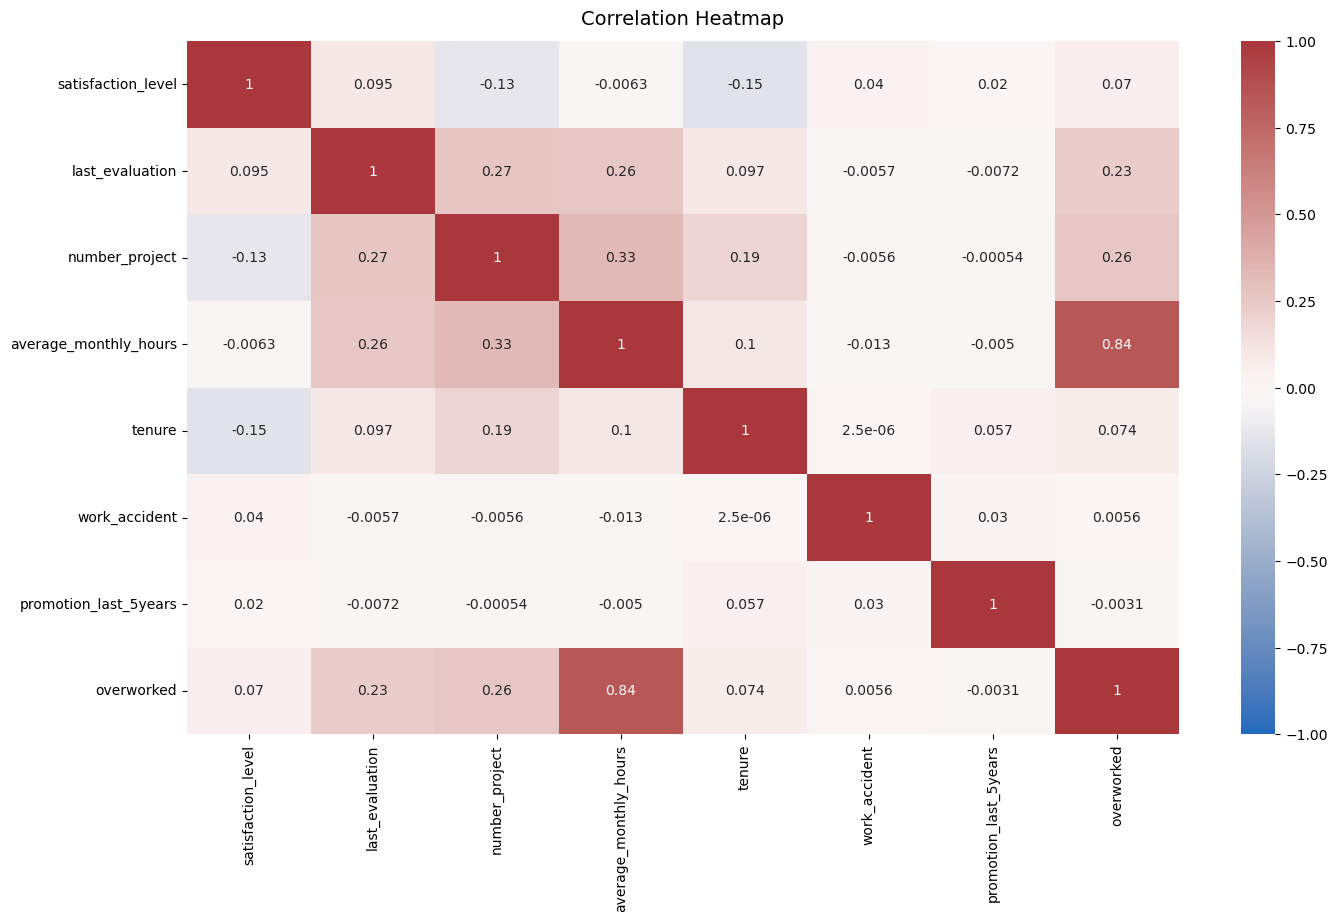

In [42]:
# Buat correlation heatmap

plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [43]:
df2.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary', 'overworked'],
      dtype='object')

perlu diingat bahwa .corr hanya menampilkan kolom yang memiliki value numerik sehingga `departement`, `salary`, dan `left` tidak dimunculkan. agar kita dapat lebih pasti dalam menghitung korelasi maka kita gunakan data asli.

In [44]:
# ubah `left` menjadi int64 lagi

# copy df2 dan jadikan df3 untuk menghitung korelasi
df3 = df2.copy()

# ubah left menjadi int64
df3['left'] = df3['left'].replace({'stay': 0 , 'left': 1})

# check hasil pengubahan
df3['left']

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

C:\Users\Fazas\AppData\Local\Temp\ipykernel_18640\2564500094.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df3.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))


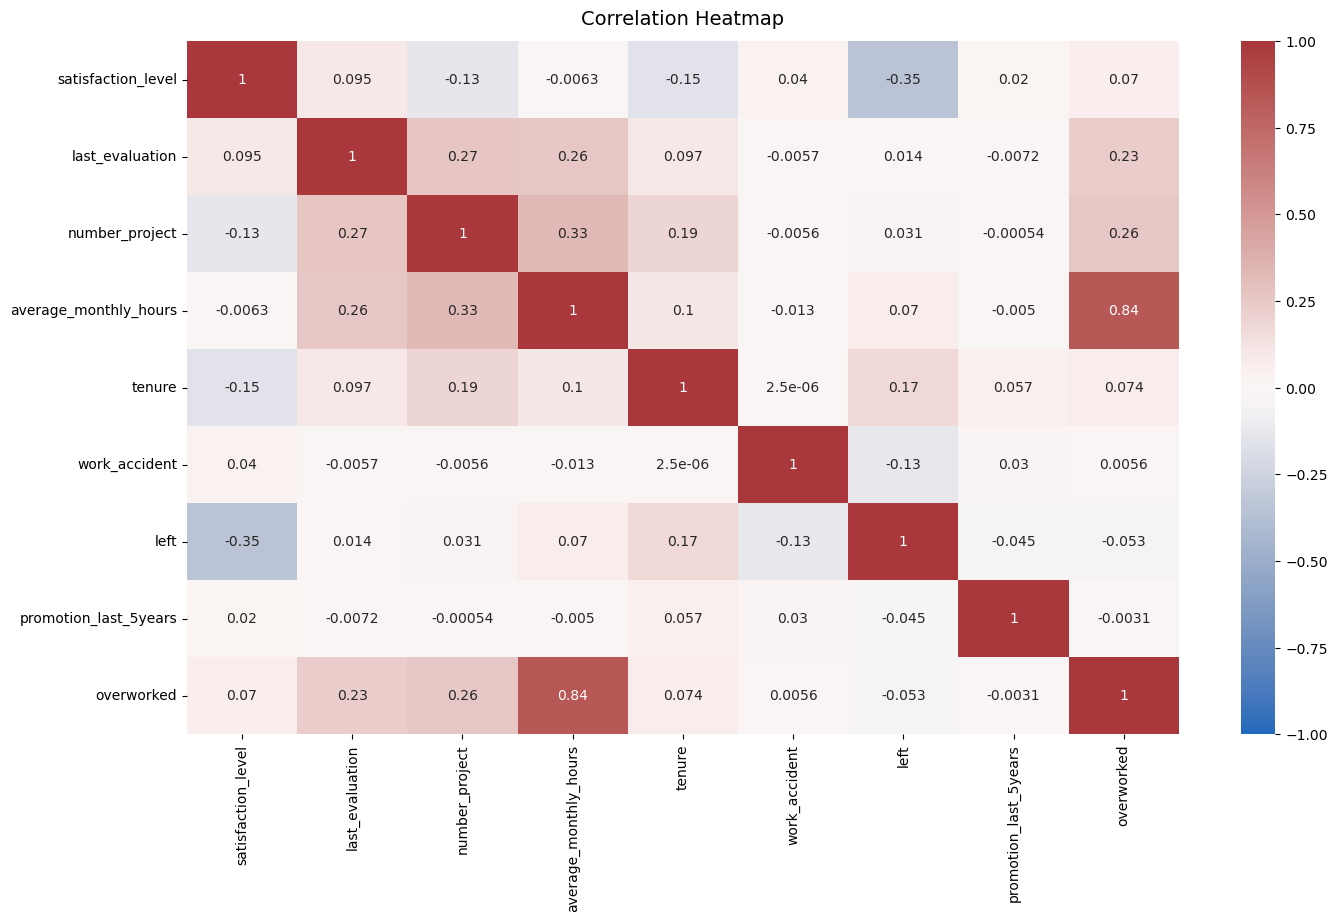

In [45]:
# Buat correlation heatmap

plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df3.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

Correlation Heatmap mengkonfirmasi bahwa `number_projects`, `average_monthly_hours`, `overworked`, dan `last_evaluation` semuanya memiliki korelasi positif satu sama lain, dan `left` memiliki korelasi negatif dengan `satisfaction_level`.

### Insights

Nampaknya karyawan meninggalkan perusahaan akibat manajemen perusahaan yang buruk. Hal ini berkaitan dengan jam kerja yang lebih lama, banyaknya proyek yang dikerjakan, dan tingkat kepuasan yang umumnya lebih rendah. Selain itu juga karyawan bekerja berjam-jam dan tidak mendapatkan promosi atau skor evaluasi yang baik juga dapat menjadi hal yang kurang memuaskan di sisi karyawan. Ada juga sekelompok karyawan di perusahaan ini yang mungkin sudah lelah. Terlihat juga bahwa jika seorang karyawan telah bekerja lebih dari enam tahun di perusahaan mereka cenderung untuk tidak meninggalkan perusahaan tersebut.

# paCe: Construct Stage
- Tentukan model mana yang paling tepat
- Construct model
- Konfirmasikan model assumptions
- Evaluasi hasil model untuk menentukan seberapa cocok model kita dengan data

## Step 3. Model Building, Step 4. Results and Evaluation
- Cocokkan model yang memprediksi variabel hasil dengan menggunakan dua atau lebih variabel independen
- Periksa model assumptions
- Evaluasi modelnya

### Identifikasi jenis prediction task.

Tujuan kami adalah memprediksi apakah seorang karyawan akan meninggalkan perusahaan, yang merupakan variabel hasil kategorikal. Jadi tugas ini melibatkan klasifikasi. Lebih khusus lagi, ini melibatkan klasifikasi biner, karena variabel hasil `left` dapat berupa 1 (menunjukkan karyawan keluar) atau 0 (menunjukkan karyawan tidak keluar).

### Identifikasi jenis model yang paling tepat untuk tugas ini.

Karena variabel yang ingin Anda prediksi (apakah seorang karyawan meninggalkan perusahaan) bersifat kategoris, kita dapat membuat model Logistic Regression, Decision tree, KNN, Random Forest, Gradient Boost modelling (LightGBM, XGBoost), dan lainnya.

Jadi, kita dapat melanjutkan dengan salah satu dari pendekatan berikut atau bisa juga dapat lebih dari satu dan menentukan perbandingannya.

### Data Preparation

In [53]:
df3.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary,overworked
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,0


In [54]:
df3['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

Sekarang mari kita melakukan fitur encoding untuk fitur2 categorical yang kita miliki.
Yang akan kita lakukan adalah :

1. Merubah fitur/kolom `department` menggunakan Binary Encoding, karena fitur ini memiliki unique data yang banyak dan tidak memiliki urutan/tidak ordinal, bila kita menggunakan One Hot Encoding akan terlalu banyak fitur baru yang terbuat. 

2. Merubah fitur/kolom `salary` menggunakan Ordinal Encoder, karena fitur ini adalah tingkat gaji yang diterima oleh karyawan.

In [52]:
transformer = ColumnTransformer([
    ('OHE', OneHotEncoder(drop='first'), ['department']),
    ('OE', OrdinalEncoder(), ['salary'])
], remainder='passthrough')

In [55]:
x = df3.drop(columns=['left'])
y = df3['left']

In [56]:
# Split data menjadi training set dan testing set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2023)

In [57]:
testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names())
testing.head()

c:\Users\Fazas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Fazas\anaconda3\lib\site-packages\category_encoders\utils.py:360: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


,OHE__x0_RandD,OHE__x0_accounting,OHE__x0_hr,OHE__x0_management,OHE__x0_marketing,OHE__x0_product_mng,OHE__x0_sales,OHE__x0_support,OHE__x0_technical,OE__salary,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,overworked
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.94,0.90,2.0,263.0,3.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.37,0.48,2.0,160.0,3.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.31,0.75,3.0,120.0,4.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.66,0.80,4.0,192.0,3.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.68,0.53,3.0,156.0,4.0,0.0,0.0,0.0


### Modeling & Evaluation

In [58]:
# Model

LogReg = LogisticRegression(random_state=2023, max_iter=1000)
KNN = KNeighborsClassifier()
Tree = DecisionTreeClassifier(random_state=2023)
SVM = SVC(probability=True, random_state=2023)
RF = RandomForestClassifier(random_state=2023)
XGB = XGBClassifier(random_state=2023)
LGB = lgb.LGBMClassifier(random_state=2023)
Adab = AdaBoostClassifier(random_state=2023)
GB = GradientBoostingClassifier(random_state=2023)

VC = VotingClassifier([
    ('model1', LogReg),
    ('model2', KNN),
    ('model3', Tree)
], voting='soft')

SC = StackingClassifier([
    ('model1', LogReg),
    ('model2', KNN),
    ('model3', Tree)
], final_estimator=SVM)

In [59]:
# resampling

RUS = RandomUnderSampler(random_state=2023)
ROS = RandomOverSampler(random_state=2023)
smote = SMOTE(random_state=2023)
NM = NearMiss()

### Model Benchmarking Default

In [60]:
# Looping Function Default ROC_AUC

models = [LogReg, KNN, Tree, SVM, RF, Adab, GB, XGB, LGB, VC, SC]
score = []
roc_auc = []
std = []
skfold=StratifiedKFold(n_splits=5)

for i in models:
    pipeline = Pipeline([
                        ('preprocess', transformer),
                        ('model', i)
                        ])
    model_cv = np.round(cross_val_score(pipeline, x_train, y_train, cv=skfold, scoring='roc_auc'),3)
    score.append(model_cv)
    roc_auc.append(model_cv.mean())
    std.append(model_cv.std())


fold_df_default = pd.DataFrame({
    'Model' : ['LogReg', 'KNN', 'Tree', 'SVM', 'RF', 'Adab', 'GB', 'XGB', 'LGB', 'VC', 'SC'],
    'Mean roc_auc' : roc_auc,
    'Std Dev' : std,
    'score' : score
}).sort_values(by='Mean roc_auc', ascending = False)

fold_df_default

,Model,Mean roc_auc,Std Dev,score
8,LGB,0.9874,0.003499,"[0.987, 0.988, 0.987, 0.982, 0.993]"
6,GB,0.9866,0.002059,"[0.986, 0.987, 0.988, 0.983, 0.989]"
7,XGB,0.9834,0.004630,"[0.979, 0.987, 0.985, 0.977, 0.989]"
4,RF,0.9816,0.003929,"[0.981, 0.983, 0.98, 0.976, 0.988]"
5,Adab,0.9790,0.002366,"[0.975, 0.982, 0.98, 0.98, 0.978]"
9,VC,0.9774,0.005238,"[0.976, 0.977, 0.976, 0.971, 0.987]"
1,KNN,0.9546,0.007003,"[0.952, 0.949, 0.959, 0.947, 0.966]"
10,SC,0.9472,0.011634,"[0.949, 0.925, 0.949, 0.958, 0.955]"
2,Tree,0.9460,0.006899,"[0.938, 0.938, 0.948, 0.951, 0.955]"
3,SVM,0.8482,0.007547,"[0.858, 0.85, 0.839, 0.84, 0.854]"


Terlihat bahwa model LightGBM adalah yang terbaik untuk roc_auc dibandingkan model lain.

### Model Benchmarking : Test Data

In [61]:
models = [LogReg, KNN, Tree, SVM, RF, Adab, GB, XGB, LGB, VC, SC]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM', 'Random Forest', 'Adaboost', 'Gradient Boost', 'XGBoost','LightGBM', 'Voting', 'Stacking']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'SVM', 'Random Forest', 'Adaboost', 'Gradient Boost', 'XGBoost','LightGBM', 'Voting', 'Stacking'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      2001
           1       0.56      0.21      0.30       398

    accuracy                           0.84      2399
   macro avg       0.71      0.59      0.61      2399
weighted avg       0.81      0.84      0.81      2399



c:\Users\Fazas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      2001
           1       0.82      0.88      0.85       398

    accuracy                           0.95      2399
   macro avg       0.90      0.92      0.91      2399
weighted avg       0.95      0.95      0.95      2399

Decision Tree 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2001
           1       0.90      0.92      0.91       398

    accuracy                           0.97      2399
   macro avg       0.94      0.95      0.94      2399
weighted avg       0.97      0.97      0.97      2399



c:\Users\Fazas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Fazas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Fazas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      2001
           1       0.00      0.00      0.00       398

    accuracy                           0.83      2399
   macro avg       0.42      0.50      0.45      2399
weighted avg       0.70      0.83      0.76      2399

Random Forest 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.99      0.92      0.95       398

    accuracy                           0.98      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399

Adaboost 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2001
           1       0.91      0.87      0.89       398

    accuracy                           0.96      2399
   macro avg       0.94      0.92      0.93      2399
weighted avg       0.96      0.96      0.

,roc_auc score
model,
LightGBM,0.982480
Gradient Boost,0.982357
XGBoost,0.980048
Adaboost,0.978095
Random Forest,0.977221
Voting,0.976708
Stacking,0.955944
KNN,0.951036
Decision Tree,0.948048


Terlihat kembali pada Test Data LightGBM merupakan model dengan performa terbaik. 

Mari sekarang kita coba lakukan resampling untuk model LightGBM kita untuk melihat apakah kita dapat mendapatkan hasil yang lebih baik.

In [62]:
# Looping Function with Resample

models = [LGB]
resample = [RUS, ROS, smote, NM]
score = []
roc_auc = []
std = []
skfold=StratifiedKFold(n_splits=5)

for i in models:
    for j in resample:
        pipeline = Pipeline_Imba([
                                ('preprocess', transformer),
                                ('resample', j),
                                ('model', i)
                                ])

        model_cv = np.round(cross_val_score(pipeline, x_train, y_train, cv=skfold, scoring='roc_auc'),3)
        score.append(model_cv)
        roc_auc.append(model_cv.mean()) 
        std.append(model_cv.std())

fold_df_resample = pd.DataFrame({
        'Model' : ['LGB RUS', 'LGB ROS', 'LGB SMOTE', 'LGB NM'],
        'Mean roc_auc' : roc_auc,
        'Std Dev' : std,
        'score' : score
}).sort_values(by='Mean roc_auc', ascending = False)

fold_df_resample.head(10)

,Model,Mean roc_auc,Std Dev,score
1,LGB ROS,0.9868,0.003487,"[0.985, 0.988, 0.985, 0.983, 0.993]"
2,LGB SMOTE,0.9866,0.003499,"[0.986, 0.987, 0.984, 0.983, 0.993]"
0,LGB RUS,0.9856,0.003137,"[0.983, 0.986, 0.986, 0.982, 0.991]"
3,LGB NM,0.9742,0.002315,"[0.971, 0.975, 0.973, 0.974, 0.978]"


jika dibandingkan dengan hasil sebelum di resample, maka hasil resample lebih baik dari tanpa resample namun tidak signifikan.

In [63]:
# Model Before Resample

pipeline = Pipeline([
                    ('preprocess', transformer),
                    ('model', LGB)
                    ])

pipeline.fit(x_train, y_train)
y_pred_after = pipeline.predict (x_test)
print(classification_report(y_test, y_pred_after))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.98      0.92      0.95       398

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



In [65]:
# Model After Resample

pipeline = Pipeline_Imba([
                        ('preprocess', transformer),
                        ('resampling', ROS),
                        ('model', LGB)
                        ])

pipeline.fit(x_train, y_train)
y_pred_after = pipeline.predict (x_test)
print(classification_report(y_test, y_pred_after))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.95      0.93      0.94       398

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.96      2399
weighted avg       0.98      0.98      0.98      2399



Terlihat bahwa model yang setelah di oversampling memiliki recall dari kedua class yang lebih seimbang. Oleh karena itu untuk kasus kali ini, mari kita gunakan model yang menggunakan oversampling.

Sekarang mari kita coba melakukan hyperparameter tuning pada model LightGBM kita untuk mendapatkan hasil yang lebih baik lagi.

### Hyperparameter Tuning

default hyperparameter LGBM => `max_bin` = 255, `num_leaves` = 31, `min_data_in_leaf` = 20, `num_iterations` = 100, `learning_rate` = 0.1

In [72]:
# Hyperparameter
hyperparam = {
    'modeling__max_bin': np.arange(200, 261, 5),
    'modeling__num_leaves': np.arange(5, 36, 5),
    'modeling__min_data_in_leaf': np.arange(5, 31, 5),
    'modeling__num_iterations': np.arange(50, 126, 25),
    'modeling__learning_rate': np.arange(0.05, 0.126, 0.025),
    'modeling__random_state' : [2023]
}

# Algo (benchmark model)
model = lgb.LGBMClassifier(random_state=2023)
sampling = RandomOverSampler(random_state=2023)

# Pipeline
pipe_model = Pipeline_Imba([
    ('preprocessing', transformer),
    ('resampling', sampling),
    ('modeling', model)
])

# GridSearch
gridsearch1 = GridSearchCV(
    estimator=pipe_model,  # Model yang ingin di-tuning
    param_grid=hyperparam,  # Hyperparameter
    cv=skfold,  # 5 fold cross validation
    scoring='roc_auc',  # ROC-AUC
    n_jobs=-1  # Maksimalkan penggunaan prosesor
)

# Fit
gridsearch1.fit(x_train, y_train)


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25


c:\Users\Fazas\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['department']),
                                                                        ('OE',
                                                                         OrdinalEncoder(),
                                                                         ['salary'])])),
                                       ('resampling',
                                        RandomOverSampler(random_state=2023)),
                                       ('modeling',
                                        LGBMClassifier(random_...

In [74]:
# best parameter

print(gridsearch1.best_params_)
print(gridsearch1.best_score_)

{'modeling__learning_rate': 0.10000000000000002, 'modeling__max_bin': 220, 'modeling__min_data_in_leaf': 25, 'modeling__num_iterations': 100, 'modeling__num_leaves': 10, 'modeling__random_state': 2023}
0.9888177885803691


Hyperparameter terbaik LGBM dari hasil Gridsearch:

- modeling__max_bin = 220, 225
- modeling__num_leaves = 10, 25 
- modeling__min_data_in_leaf = 10, 25
- modeling__num_iterations = 100
- modeling__learning_rate = 0.1
- modeling__random_state: 2023 

Untuk hyperparameter `learning_rate` dan `num_iterations` default valuenya tetap yang terbaik, untuk `num_leaves` bisa dicoba diperkecil lagi dan dibandingkan dengan 25 (value terbaiknya saat ini), utk `min_data_in_leaf` bisa dicoba disekitar angka 30 dan dibandingkan dengan 30 (value terbaiknya skrg), untuk `num_iterations` bisa dicoba disekitar angka 75 dan dibandingkan dengan 75 (value terbaiknya skrg).

Tetapi untuk kali ini hyperparameter tuning yang akan kita lakukan hanya sampai sini saja.

Patut diperhatikan bahwa random_state dari modelnya, metode sampling, dan KFold yang berbeda akan menghasilkan hyperparameter terbaik yg berbeda juga, karena akan dipengaruhi oleh datanya juga.

In [75]:
best_model = gridsearch1.best_estimator_
best_model.fit(x_train, y_train)

c:\Users\Fazas\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['department']),
                                                 ('OE', OrdinalEncoder(),
                                                  ['salary'])])),
                ('resampling', RandomOverSampler(random_state=2023)),
                ('modeling',
                 LGBMClassifier(learning_rate=0.10000000000000002, max_bin=220,
                                min_data_in_leaf=25, num_iterations=100,
                                num_leaves=10, random_state=2023))])

In [76]:
estimator.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['department']),
                                                 ('OE', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model',
                 StackingClassifier(estimators=[('model1',
                                                 LogisticRegression(max_iter=1000,
                                                                    random_state=2023)),
                                                ('model2',
                                                 KNeighborsClassifier()),
                                                ('model3',
                                                 DecisionTreeClassifier(random_state=2023))],
                       

In [77]:
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default LGBM : ', roc_auc_default)
print('ROC AUC Score Tuned LGBM : ', roc_auc_tuned)

print('Selisih antara Tuning dan Default :', roc_auc_tuned - roc_auc_default)

ROC AUC Score Default LGBM :  0.955944138483522
ROC AUC Score Tuned LGBM :  0.9846973498175536
Selisih antara Tuning dan Default : 0.028753211334031636


Terlihat bahwa model LGBM setelah di tuning memiliki nilai ROC_AUC lebih baik sekitar 0.0.0.28753211334031636 / 2.86%.

Mari kita lihat perbandingan classification reportnya.

In [78]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2001
           1       0.95      0.91      0.93       398

    accuracy                           0.98      2399
   macro avg       0.96      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.93      0.93      0.93       398

    accuracy                           0.98      2399
   macro avg       0.96      0.96      0.96      2399
weighted avg       0.98      0.98      0.98      2399



Terlihat bahwa model LGBM yang sudah kita tuning memiliki classification report yang lebih baik walaupun hanya sedikit. oleh karena itu kita akan menggunakan model LGBM yang sudah di tuned sebagai model akhir.

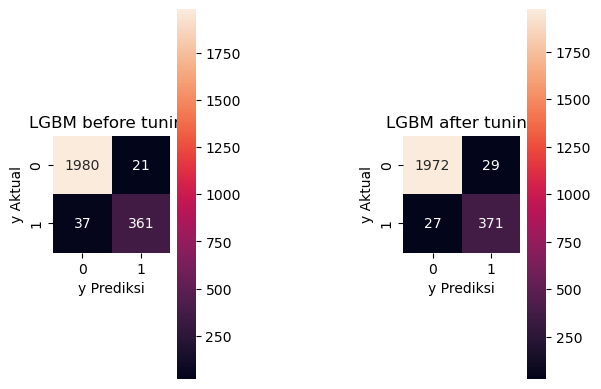

In [80]:
# Model LGBM before tuning
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test, y_pred_default), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('LGBM before tuning')

# Model LGBMt after tuning
plt.subplot(1,3,3)
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('LGBM after tuning');

### Feature Importances

Mari sekarang kita lihat fitur/kolom apa saja yang paling penting untuk model LGBM kita

In [81]:
best_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['department']),
                                                 ('OE', OrdinalEncoder(),
                                                  ['salary'])])),
                ('resampling', RandomOverSampler(random_state=2023)),
                ('modeling',
                 LGBMClassifier(learning_rate=0.10000000000000002, max_bin=220,
                                min_data_in_leaf=25, num_iterations=100,
                                num_leaves=10, random_state=2023))])

,feature,importance,stdev
0,satisfaction_level,0.128357,0.001551
2,number_project,0.053586,0.001416
4,tenure,0.050125,0.001722
1,last_evaluation,0.023978,0.001416
3,average_monthly_hours,0.020642,0.001818
8,salary,0.001439,0.000102
7,department,0.000897,0.000252
5,work_accident,0.000667,0.000313
6,promotion_last_5years,0.000000,0.000000
9,overworked,0.000000,0.000000


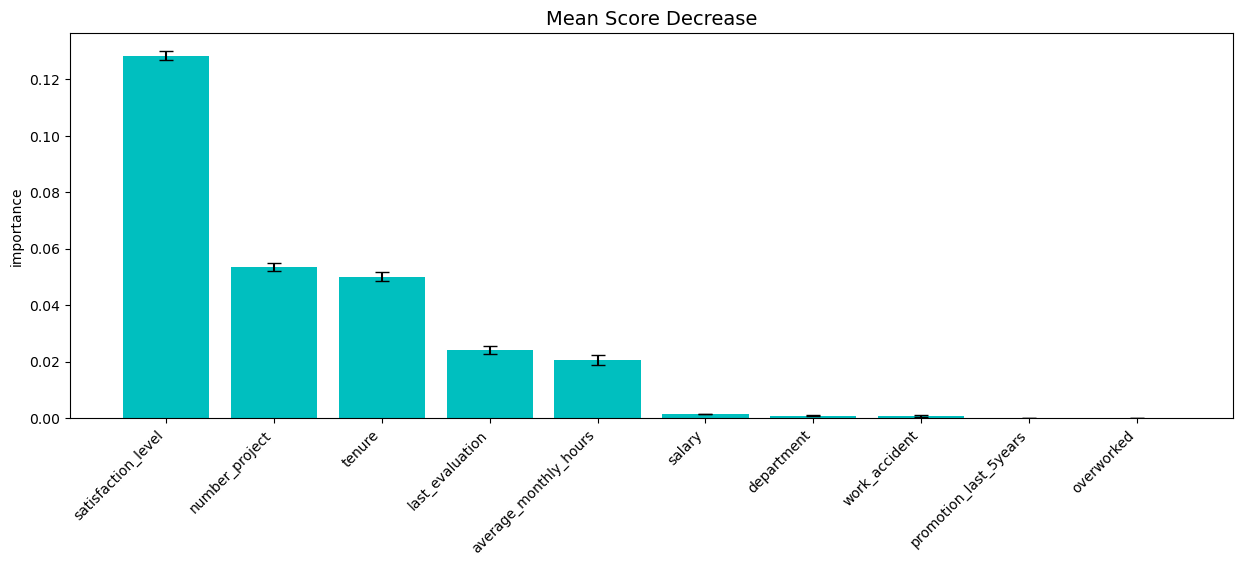

In [82]:
from jcopml.feature_importance import mean_score_decrease

mean_score_decrease(x_train, y_train, best_model, plot=True)

Terlihat bahwa ternyata untuk model LightGBM kita, fitur/kolom `satisfaction_level` adalah yang paling penting, kemudian diikuti dengan `number_project`, `tenure`, `average_monthly_hours`, dan `last_evaluation`

Lalu feature `department`, `salary`, `work_accident`, dan `promotion_last_5years` merupaka feature yang kurang penting.

Model ini akan membantu HR perusahaan untuk dapat gunakan guna mengetahui karyawan mana saja yang memiliki kemungkinan untuk keluar dari perusahaan dan juga HR mengetahui apa saja yang menyebabkan karyawan betah atau ingin keluar. Dengan mengetahui nya perusahaan dapat melakukan usaha untuk meningkatkan retensi karyawan sehingga mereka tetap bertahan dengan perusahaa, disisi lain hal ini juga membantu mengurangi cost dari segi hiring dan juga training dimana akan membutuhkan biaya yang tidak sedikit dan juga waktu yang lama.

## Saving Final Tuning to Pickle

In [85]:
# best model
best_model = gridsearch1.best_estimator_

# fitting
best_model.fit(x_train, y_train)

# save pickle
pickle.dump(best_model, open('best_lightGBM_capstone.sav','wb'))

[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25


c:\Users\Fazas\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


# pacE: Execute Stage
- Interpret model performance dan hasil
- Bagikan langkah-langkah yang dapat ditindaklanjuti dengan pemangku kepentingan


## Step 4. Results and Evaluation
- Intpretasi model
- Evaluate model performance using metrics
- evaluasi performa model menggunakan metrics
- Siapkan hasil, visualisasi, dan langkah-langkah yang dapat ditindaklanjuti untuk dibagikan kepada pemangku kepentingan




## Conclusion & Recommendation

### Conclusion

In [83]:
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.93      0.93      0.93       398

    accuracy                           0.98      2399
   macro avg       0.96      0.96      0.96      2399
weighted avg       0.98      0.98      0.98      2399



Berdasarkan hasil classification report dari model ini, dapat disimpulkan bahwa bila seandainya nanti kita menggunakan model ini untuk melihat list karyawan yang akan keluar/tetap, maka model ini dapat mengetahui 99% karyawan yang tetap bekerja dengan perusahaan, dan model ini dapat mendapatkan 93% karyawan yang ingin keluar dari perusahaan. (semua ini berdasarkan recallnya)

Model ini memiliki ketepatan prediksi karyawan yang ingin keluar sebesar 93% (precisionnya), jadi setiap model kita memprediksi bahwa seorang karyawan itu ingin keluar, maka kemungkinan tebakannya benar itu sebesar kurang lebih 93%. Maka masih akan ada karyawan yang sebenarnya tidak keluar tetapi diprediksi sebagai karyawan yang keluar sekitar 6% dari keseluruhan karyawan yang keluar (berdasarkan recall).

### Recommendation

Model dan feature importance yang diambil dari model mengonfirmasi bahwa karyawan di perusahaan tersebut tidak puas bekerja di perusahaan.

Untuk mempertahankan karyawan, rekomendasi berikut dapat disampaikan kepada pemangku kepentingan:

* Tingkatkan kepuasaan karyawan yang bekerja.
* Batasi jumlah proyek yang dikerjakan oleh setiap karyawan.
* Pertimbangkan untuk mempromosikan karyawan yang telah bekerja di perusahaan setidaknya selama empat tahun, atau lakukan penyelidikan lebih lanjut tentang mengapa karyawan dengan masa kerja empat tahun merasa sangat tidak puas.
* Berikan penghargaan kepada karyawan yang bekerja lebih lama, atau tidak mengharuskan mereka melakukannya.
* Jika karyawan tidak memahami kebijakan upah lembur perusahaan, beri tahu mereka tentang hal ini. Jika ekspektasi seputar beban kerja dan waktu istirahat tidak eksplisit, jelaskan.
* Mengadakan diskusi di seluruh perusahaan dan dalam tim untuk memahami dan mengatasi budaya kerja perusahaan, secara menyeluruh dan dalam konteks tertentu.
* Nilai evaluasi yang tinggi tidak boleh diberikan kepada karyawan yang bekerja 200+ jam per bulan. Pertimbangkan skala proporsional untuk memberi penghargaan kepada karyawan yang berkontribusi lebih banyak/berusaha lebih keras.

**Untuk Modeling**
* Mencoba algorithm ML yang lain dan juga mencoba hyperparameter tuning kembali, coba gunakan teknik oversampling yang berbeda juga selain Random Over Sampling, seperti SMOTENC, dll. 
* Menganalisa data-data yang model kita masih salah tebak untuk mengetahui alasannya dan karakteristiknya bagaimana.
* mengurangi fitur yang tidak berpengaruh terhadap target (keluar atau tidak)

**tambahan**:

Jika memang terdapat kekhawatiran tentang kebocoran data. Sebaiknya pertimbangkan bagaimana prediksi berubah ketika `last_evaluation` dihapus dari data. Ada kemungkinan bahwa evaluasi tidak dilakukan terlalu sering, sehingga akan berguna jika dapat memprediksi retensi karyawan tanpa fitur ini. Mungkin juga skor evaluasi menentukan apakah seorang karyawan akan keluar atau tetap tinggal, sehingga berguna untuk melakukan pivot dan mencoba memprediksi skor kinerja. Hal yang sama juga berlaku untuk skor kepuasan.

Catatan:

Dataset yang digunakan adalah dataset yang diberikan oleh Google Advanced Data Analytic yang bersumber dari [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), pada project ini baik yang dikerjakan sendiri maupun yang dikerjakan sesuai dengan guideline dari google memang memiliki hasil mean yang sudah tinggi.

## Terima Kasih